# **Analyse Health and Demographic Data to identify common traits leading to Heart Disease**
- *Mentored Project under Practo*

## **Importing Libraries & Git Automation**

In [20]:
# Importing Libraries
%%capture

!pip install python-dotenv

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
random.seed(17)

import gdown, os, pytz
from datetime import datetime
from google.colab import drive
drive.mount('/content/drive')       # Comment this if you are a Guest

pd.set_option("display.max_columns",None)

In [25]:
# Git Automation - Notebook AutoUpdate to Git Script
%%capture

if not os.path.exists("/content/NotebookAutoUpdateGithub.py"):
    !wget https://raw.githubusercontent.com/parth-f/Analyse-Health-and-Demographic-Data-to-identify-common-traits-leading-to-Heart-Disease/main/NotebookAutoUpdateGithub.py

NotebookAutoUpdateGithub.upload_to_github(
    github_token=os.getenv('SecretKey'), repo_owner="parth-f",
    repo_name="Analyse-Health-and-Demographic-Data-to-identify-common-traits-leading-to-Heart-Disease",
    file_path="/content/drive/MyDrive/Colab Notebooks/Analyse_Health_and_Demogrphic_Data_to_identify_common_traits_leading_to_Heart_Disease-Practo_Certified.ipynb",
    commit_message=f"Autoupdate to Github at {autoup.my_date_time()}"
)

NameError: name 'NotebookAutoUpdateGithub' is not defined

# **1. Data Ingestion**

In [23]:
datasets = {
    "LLCP2019.XPT": "https://drive.google.com/uc?id=1qbyAIv1AGF6f4WwY-HyVaPIz2kxZWt25",
    "LLCP2021.XPT": "https://drive.google.com/uc?id=1gzWYlVUZXB2CQeOvlaPo0J1kvA1QoIjB",
    "LLCP2023.XPT": "https://drive.google.com/uc?id=1FPovO1ZkKvxmMzVHx0U8Oqy5hOJIE7QV"
}

for data, data_url in datasets.items():
    if not os.path.exists(data):
      # !cp /content/drive/MyDrive/Project/Heart_ML/Data* /content/    # For Owner
      gdown.download(data_url, quiet=True)                             # For Guest - Use this to run if you are a guest running this notebook

    df_name = f"df{data[-6:-4]}"
    if df_name not in locals():
        locals()[df_name] = pd.read_sas(data, format='xport', encoding='utf-8')
        print(f"{df_name} Dataframe created.")
    else:
        print(f"{df_name} Dataframe already exists. Skipping creation.")

df19 Dataframe already exists. Skipping creation.
df21 Dataframe already exists. Skipping creation.
df23 Dataframe already exists. Skipping creation.


In [24]:
# Columns Name
print( str(df23.shape[1]) + " Columns = " +  str(df23.columns.tolist()))

350 Columns = ['_STATE', 'FMONTH', 'IDATE', 'IMONTH', 'IDAY', 'IYEAR', 'DISPCODE', 'SEQNO', '_PSU', 'CTELENM1', 'PVTRESD1', 'COLGHOUS', 'STATERE1', 'CELPHON1', 'LADULT1', 'NUMADULT', 'RESPSLC1', 'LANDSEX2', 'LNDSXBRT', 'SAFETIME', 'CTELNUM1', 'CELLFON5', 'CADULT1', 'CELLSEX2', 'CELSXBRT', 'PVTRESD3', 'CCLGHOUS', 'CSTATE1', 'LANDLINE', 'HHADULT', 'SEXVAR', 'GENHLTH', 'PHYSHLTH', 'MENTHLTH', 'POORHLTH', 'PRIMINS1', 'PERSDOC3', 'MEDCOST1', 'CHECKUP1', 'EXERANY2', 'EXRACT12', 'EXEROFT1', 'EXERHMM1', 'EXRACT22', 'EXEROFT2', 'EXERHMM2', 'STRENGTH', 'BPHIGH6', 'BPMEDS1', 'CHOLCHK3', 'TOLDHI3', 'CHOLMED3', 'CVDINFR4', 'CVDCRHD4', 'CVDSTRK3', 'ASTHMA3', 'ASTHNOW', 'CHCSCNC1', 'CHCOCNC1', 'CHCCOPD3', 'ADDEPEV3', 'CHCKDNY2', 'HAVARTH4', 'DIABETE4', 'DIABAGE4', 'MARITAL', 'EDUCA', 'RENTHOM1', 'NUMHHOL4', 'NUMPHON4', 'CPDEMO1C', 'VETERAN3', 'EMPLOY1', 'CHILDREN', 'INCOME3', 'PREGNANT', 'WEIGHT2', 'HEIGHT3', 'DEAF', 'BLIND', 'DECIDE', 'DIFFWALK', 'DIFFDRES', 'DIFFALON', 'FALL12MN', 'FALLINJ5', 'SMOK

## **Feature Selection**
- Reduced the dataset from over 300 features to 21 key features by eliminating irrelevant, redundant, and highly correlated columns.
- Retained only meaningful features to ensure relevance and improve the quality of data analysis.
### **Selected Features**

| #  | Original Var. Name   | Variables Rename     | Variable Description                                  |
|----|----------------------|----------------------|-------------------------------------------------------|
| 1  | _MICHD               | **HRT_DIS**          | Ever had Coronary Heart Disease                       |
| 2  | _BMI5                | **BMI**              | Body Mass Index                                       |
| 3  | _AGEG5YR             | **AGE**              | Age in five-year age categories calculated variable (13 groups) |
| 4  | _SEX                 | **GENDER**           | Sex variable - (Male, Female)                         |
| 5  | CVDSTRK3             | **STROKE**           | Ever Diagnosed with a Stroke                          |
| 6  | DIABETE4             | **DIABETES**         | Ever told you had diabetes                            |
| 7  | _LTASTH1             | **ASTHMA**           | Ever told you had asthma                              |
| 8  | GENHLTH              | **GENERAL_HLTH**     | General Health Status                                 |
| 9  | MENTHLTH             | **MENTHLTH_BAD**      | Mental Health Status                                  |
| 10 | PHYSHLTH             | **PHYSHLTH_BAD**    | Days Physical Health Not Good                         |
| 11 | DIFFWALK             | **DIFFICUTLY_WALK**  | Do you have serious difficulty walking or climbing stairs? |
| 12 | _SMOKER3             | **SMOKING**          | Four-level Smoker status                              |
| 13 | _EDUCAG              | **EDUCATION_LVL**    | Level of education completed                          |
| 14 | MARITAL              | **MARITAL_STATE**          | Marital Status                                        |
| 15 | _CHLDCNT             | **NUM_CHILDERN**     | Number of children in household                       |
| 16 | _URBSTAT             | **URBAN/RURAL**      | Urban/Rural Status                                    |
| 17 | CHCKDNY2             | **KIDNEY_DISEASE**   | Ever told you have kidney disease?                    |
| 18 | _RFHYPE / _RFHYPE6   | **HIGH_BP**          | Ever Told Blood Pressure High                         |
| 19 | TOLDHI2 / TOLDHI3    | **HIGH_CHO**         | High Cholesterol                                      |
| 20 | _RFDRHV7 / _RFDRHV8  | **DRINKING**         | Heavy Alcohol Consumption                             |
| 21 | _INCOMG / _INCOMG1   | **INCOME_LVL**       | Income categories                                     |


In [7]:
# List of Selected Feature
selected_var19 = [ '_MICHD'  , '_BMI5'   , '_AGEG5YR', '_SEX'    , 'CVDSTRK3', 'DIABETE4', '_LTASTH1', 'GENHLTH' , 'MENTHLTH', 'PHYSHLTH',
                   'DIFFWALK', '_SMOKER3', '_EDUCAG' , 'MARITAL' , '_CHLDCNT', '_URBSTAT', 'CHCKDNY2',
                   '_RFHYPE5', 'TOLDHI2' ,'_RFDRHV7', '_INCOMG'   ]

selected_var21 = [ '_MICHD'  , '_BMI5'   , '_AGEG5YR', '_SEX'    , 'CVDSTRK3', 'DIABETE4', '_LTASTH1', 'GENHLTH' , 'MENTHLTH', 'PHYSHLTH',
                   'DIFFWALK', '_SMOKER3', '_EDUCAG' , 'MARITAL' , '_CHLDCNT', '_URBSTAT', 'CHCKDNY2',
                   '_RFHYPE6', 'TOLDHI3' ,'_RFDRHV7', '_INCOMG1'  ]

selected_var23 = [ '_MICHD'  , '_BMI5'   , '_AGEG5YR', '_SEX'    , 'CVDSTRK3', 'DIABETE4', '_LTASTH1', 'GENHLTH' , 'MENTHLTH', 'PHYSHLTH',
                   'DIFFWALK', '_SMOKER3', '_EDUCAG' , 'MARITAL' , '_CHLDCNT', '_URBSTAT', 'CHCKDNY2',
                   '_RFHYPE6', 'TOLDHI3' , '_RFDRHV8', '_INCOMG1'  ]

In [8]:
# Dataframe updates with Selected Featuers
df19 = df19[selected_var19]
df23 = df23[selected_var23]
df21 = df21[selected_var21]

In [9]:
# Variables Rename Dictonary
var_rename = {
    "_MICHD"   : "HRT_DIS",            "_BMI5"    : "BMI",                  "_AGEG5YR" : "AGE",
    "_SEX"     : "GENDER",             "CVDSTRK3" : "STROKE",               "DIABETE4" : "DIABETES",
    "_LTASTH1" : "ASTHMA",             "GENHLTH"  : "GENERAL_HLTH",         "MENTHLTH" : "MENTHLTH_BAD",
    "PHYSHLTH" : "PHYSHLTH_BAD",       "DIFFWALK" : "DIFFICUTLY_WALK",      "_SMOKER3" : "SMOKING",
    "_EDUCAG"  : "EDUCATION_LVL",      "MARITAL"  : "MARITAL_STATE",        "_CHLDCNT" : "NUM_CHILDERN",
    "_URBSTAT" : "URBAN/RURAL",        "CHCKDNY2" : "KIDNEY_DISEASE",       "_RFHYPE5" : "HIGH_BP",
    "_RFHYPE6" : "HIGH_BP",            "TOLDHI2"  : "HIGH_CHOL",            "TOLDHI3"  : "HIGH_CHOL",
    "_RFDRHV7" : "DRINKING",           "_RFDRHV8" : "DRINKING",             "_INCOMG"  : "INCOME_LVL",
    "_INCOMG1" : "INCOME_LVL",
}

In [10]:
# Rename the Variables
df19.rename(columns=var_rename,inplace =True)
df21.rename(columns=var_rename,inplace =True)
df23.rename(columns=var_rename,inplace =True)

<ipython-input-10-f0c38ae8895d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df21.rename(columns=var_rename,inplace =True)


### **1.1 Group Mapping**

In [ ]:
print("Unique Value in df's \n" )
print("df19 - " + str( sorted( df19['INCOME_LVL'].unique().tolist() ) ) )
print("df21 - " + str( sorted( df21['INCOME_LVL'].unique().tolist() ) ) )
print("df23 - " + str( sorted( df23['INCOME_LVL'].unique().tolist() ) ) )

Unique Value in df's 

df19 - [1.0, 2.0, 3.0, 4.0, 5.0, 9.0]
df21 - [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 9.0]
df23 - [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 9.0]


#### **The 2019 Dataset has only 5 Income Groups** :
```
1 ->  Less than $15,000 Notes     
2 ->  $15,000 to < $25,000 Notes   
3 ->  $25,000 to < $35,000 Note    
4 ->  $35,000 to < $50,000 Notes   
5 ->  $50,000 or more Notes        
```
#### **While the 2021 - 23 Dataset has 7 Income Group** :
```
1 ->  Less than $15,000 Notes      
2 ->  $15,000 to < $25,000 Notes   
3 ->  $25,000 to < $35,000 Notes   
4 ->  $35,000 to < $50,000 Notes   
5 ->  $50,000 to < $100,000 Notes  
6 ->  $100,000 to < $200,000 Notes
7 ->  $200,000 or more Notes       
```
- We need to fix this imbalance in the data

In [ ]:
# Printing Count of Values in 5, 6, 7 in df19, df21, df23 respectlively
print(f"df19 =>  5 : {df19['INCOME_LVL'].value_counts()[5]}")
print(f"df21 =>  5 : {df21['INCOME_LVL'].value_counts()[5]}\t 6 : {df21['INCOME_LVL'].value_counts()[6]}\t 7 : {df21['INCOME_LVL'].value_counts()[7]}")
print(f"df23 =>  5 : {df23['INCOME_LVL'].value_counts()[5]}\t 6 : {df23['INCOME_LVL'].value_counts()[6]}\t 7 : {df23['INCOME_LVL'].value_counts()[7]}")

df19 =>  5 : 172045
df21 =>  5 : 107246	 6 : 67411	 7 : 18952
df23 =>  5 : 107027	 6 : 76637	 7 : 26770


In [ ]:
# Counting Values of 5, 6, 7 in df21 and df23
cnt5 = df21['INCOME_LVL'].value_counts()[5] + df23['INCOME_LVL'].value_counts()[5]
cnt6 = df21['INCOME_LVL'].value_counts()[6] + df23['INCOME_LVL'].value_counts()[6]
cnt7 = df21['INCOME_LVL'].value_counts()[7] + df23['INCOME_LVL'].value_counts()[7]

# Calculating Ratio of 5:6:7 distrbtion in df21 + df23 datasets
ratio5 = round(float( cnt5 / ( cnt5 + cnt6 + cnt7 )),3)
ratio6 = round(float( cnt6 / ( cnt5 + cnt6 + cnt7 )),3)
ratio7 = round(float( cnt7 / ( cnt5 + cnt6 + cnt7 )),3)

# Ration of 5, 6, 7 in df21 and df23
print( f"Ratio = {ratio5} : {ratio6} : {ratio7}")

Ratio = 0.53 : 0.357 : 0.113


#### **Ratio of 5, 6, 7 distribution is  5.3 : 3.5 : 1.1  respectively**

In [ ]:
five_indices = df19[df19['INCOME_LVL'] == 5].index

# Shuffling the indices to ensure randomness
shuffled_indices = np.random.permutation(five_indices)

# Calculating the number of samples for each set based on the 4:1:5 ratio 6:7:5
total_length = len(shuffled_indices)
set6_length = int(total_length * ratio6)  # 3.56/10
set7_length = int(total_length * ratio7)  # 1.13/10

# Split the shuffled indices into three sets
set6_indices = shuffled_indices[:set6_length]
set7_indices = shuffled_indices[set6_length : set6_length + set7_length]

df19.loc[set6_indices, 'INCOME_LVL'] = 6
df19.loc[set7_indices, 'INCOME_LVL'] = 7

In [ ]:
# Printing Count of Values in 5, 6, 7 in df19, df21, df23
print(f"df19 =>  5 : {df19['INCOME_LVL'].value_counts()[5]}\t 6 : {df19['INCOME_LVL'].value_counts()[6]}\t 7 : {df19['INCOME_LVL'].value_counts()[7]}")
print(f"df21 =>  5 : {df21['INCOME_LVL'].value_counts()[5]}\t 6 : {df21['INCOME_LVL'].value_counts()[6]}\t 7 : {df21['INCOME_LVL'].value_counts()[7]}")
print(f"df23 =>  5 : {df23['INCOME_LVL'].value_counts()[5]}\t 6 : {df23['INCOME_LVL'].value_counts()[6]}\t 7 : {df23['INCOME_LVL'].value_counts()[7]}")

df19 =>  5 : 91184	 6 : 61420	 7 : 19441
df21 =>  5 : 107246	 6 : 67411	 7 : 18952
df23 =>  5 : 107027	 6 : 76637	 7 : 26770


# **2. Concatinating the Dataframes**

In [ ]:
com_df = pd.concat([df19,df21,df23], axis =0 ,ignore_index=True)

In [ ]:
com_df.shape

(1290284, 21)

# **3. Data Cleaning**

### **3.1 Removing Unwanted Data & Data Transformation**

In [ ]:
com_df = com_df.dropna()
com_df.shape

(1006856, 21)

In [ ]:
# Custom Column Description Function
def col_description(df,col):
    print("TOTAL COLUMNS : " + str(df[col].shape[0]))
    print(df[col].value_counts())

### **1) HRT_DIS** - Heart Disease

In [ ]:
col_description(com_df,"HRT_DIS")

TOTAL COLUMNS : 1006856
HRT_DIS
2.0    912531
1.0     94325
Name: count, dtype: int64


In [ ]:
# 1 - Yes - Reported having "Heart Disease"
# 2 - No  - Did not report having "Heart Disease"

com_df.loc[:,'HRT_DIS'] = com_df['HRT_DIS'].replace(2,0)
col_description(com_df,"HRT_DIS")

TOTAL COLUMNS : 1006856
HRT_DIS
0.0    912531
1.0     94325
Name: count, dtype: int64


### **2) BMI** - Body Mass Index

In [ ]:
com_df['BMI'].unique()

array([2817., 1854., 3162., ..., 4741., 1394., 6856.])

In [ ]:
# BMI/100 - Example 4018 is 40.18 kg
com_df.loc[:,'BMI'] = com_df['BMI'].div(100).round()
com_df['BMI'].unique()

array([ 28.,  19.,  32.,  21.,  33.,  31.,  24.,  17.,  22.,  23.,  26.,
        27.,  25.,  35.,  36.,  30.,  16.,  34.,  41.,  29.,  37.,  20.,
        42.,  43.,  39.,  55.,  38.,  40.,  18.,  50.,  12.,  45.,  53.,
        48.,  47.,  44.,  52.,  46.,  51.,  57.,  49.,  74.,  59.,  60.,
        15.,  14.,  54.,  58.,  61.,  63.,  67.,  13.,  70.,  72.,  56.,
        62.,  64.,  68.,  69.,  71.,  76.,  73.,  65.,  66.,  92.,  86.,
        77.,  85.,  75.,  79.,  80.,  82., 100.,  84.,  87.,  88.,  81.,
        78.,  97.,  94.,  89.,  83.,  99.,  96.,  91.,  98.,  95.,  90.])

### **3) AGE** - Age of the Person


 The Age is already Encoded by Age - Age Group.

| Value     | Age Range |
|:----------|:----------|
| 1         | 18 - 24 year old |
| 2         | 25 - 29 year old |
| 3         | 30 - 34 year old |
| 4         | 35 - 39 year old |
| 5         | 40 - 44 year old |
| 6         | 45 - 49 year old |
| 7         | 50 - 54 year old |
| 8         | 55 - 59 year old |
| 9         | 60 - 64 year old |
| 10        | 65 - 69 year old |
| 11        | 70 - 74 year old |
| 12        | 75 - 79 year old |
| 13        | 80 or More year old |

In [ ]:
com_df["AGE"].unique()

array([13., 11., 10., 12.,  8.,  7.,  9.,  6.,  5.,  4.,  1., 14.,  3.,
        2.])

In [ ]:
# Removing 14 -> Refused to Answer
com_df = com_df[com_df['AGE'] != 14]
com_df["AGE"].unique()

array([13., 11., 10., 12.,  8.,  7.,  9.,  6.,  5.,  4.,  1.,  3.,  2.])

### **4) GENDER** - Sex of Respondent

In [ ]:
# 1 - Male, 2 - Female
col_description(com_df,"GENDER")

TOTAL COLUMNS : 996273
GENDER
2.0    525552
1.0    470721
Name: count, dtype: int64


### **5) STROKE** - Had a Stroke

In [ ]:
col_description(com_df,"STROKE")

TOTAL COLUMNS : 996273
STROKE
2.0    949111
1.0     44918
7.0      2169
9.0        75
Name: count, dtype: int64


In [ ]:
# 1 - Yes
# 2 - No
# 7 - Don’t know/Not sure
# 9 - Refused

# Removing 7 and 9
com_df = com_df[com_df['STROKE'] != 7]
com_df = com_df[com_df['STROKE'] != 9]

# Binary Encoding - Converted 2 to zero to make it binary (0 - No, 1- Yes)
com_df.loc[:,'STROKE'] = com_df['STROKE'].replace(2,0)

col_description(com_df,"STROKE")

TOTAL COLUMNS : 994029
STROKE
0.0    949111
1.0     44918
Name: count, dtype: int64


### **6) DIABETES** - Ever had Diabetes

In [ ]:
col_description(com_df,"DIABETES")

TOTAL COLUMNS : 994029
DIABETES
3.0    816570
1.0    144444
4.0     23931
2.0      7936
7.0      1038
9.0       110
Name: count, dtype: int64


In [ ]:
# 1 - Yes
# 2 - Yes, Only during Pregancy
# 3 - No
# 4 - Told borderline high or pre-hypertensive or elevated blood pressure
# 7 - Don't  know
# 9 - Refuesed

# Convert 4 to 1 as - Yes, (assume borderline to be approximatly bp high ) so considered / True
# Convert 2 to 0 as - Only during Pregancy, is more related to pregancy than high bp so considerd no, thats why 0 / False
# Convert 3 to 9 as - Binary Encoding - 3 = No, which should be zero as (0 - No, 1- Yes)
com_df.loc[:,'DIABETES'] = com_df['DIABETES'].replace({4:1,2:0,3:0})

# Removing 7 and 9
com_df = com_df[com_df['DIABETES'] != 7]
com_df = com_df[com_df['DIABETES'] != 9]

# Column Value Description
col_description(com_df,"DIABETES")

TOTAL COLUMNS : 992881
DIABETES
0.0    824506
1.0    168375
Name: count, dtype: int64


### **7) ASTHMA** - Ever had Asthma

In [ ]:
col_description(com_df,"ASTHMA")

TOTAL COLUMNS : 992881
ASTHMA
1.0    848721
2.0    141440
9.0      2720
Name: count, dtype: int64


In [ ]:
# Converted 2 to zero to make it binary (0 - No, 1- Yes)
com_df.loc[:,'ASTHMA'] = com_df['ASTHMA'].replace({1:0,2:1})

# Removing 9 (Missing)
com_df = com_df[com_df['ASTHMA'] != 9]

col_description(com_df,"ASTHMA")

TOTAL COLUMNS : 990161
ASTHMA
0.0    848721
1.0    141440
Name: count, dtype: int64


### **8) GENERAL_HLTH**

In [ ]:
col_description(com_df,"GENERAL_HLTH")

TOTAL COLUMNS : 990161
GENERAL_HLTH
2.0    337973
3.0    316029
1.0    155125
4.0    132751
5.0     46362
7.0      1430
9.0       491
Name: count, dtype: int64


In [ ]:
# 1 - Excellent
# 2 - Very Good
# 3 - Good
# 4 - Fair
# 5 - Poor
# 7 , 9 - Values are Missing / Refused to answer

# Removing 7 and 9
com_df = com_df[com_df['GENERAL_HLTH'] != 7]
com_df = com_df[com_df['GENERAL_HLTH'] != 9]

col_description(com_df,"GENERAL_HLTH")

TOTAL COLUMNS : 988240
GENERAL_HLTH
2.0    337973
3.0    316029
1.0    155125
4.0    132751
5.0     46362
Name: count, dtype: int64


### **9) MENTHLTH_BAD** - Number of Days Mental Health Not Good

In [ ]:
print("TOTAL COLUMNS : " + str( com_df['MENTHLTH_BAD'].shape[0]))
print("UNIQUE VALUES : " + str( com_df['MENTHLTH_BAD'].unique()))

TOTAL COLUMNS : 988240
UNIQUE VALUES : [88. 30. 77.  4.  1.  2. 15.  5.  7. 10.  3. 25.  6. 21. 20.  8. 14. 99.
 17. 28. 12. 16. 27. 22. 29. 23. 26. 24. 13.  9. 18. 11. 19.]


In [ ]:
# Removing 9 ( Refused to ans)

# change 88 to 0 because it means none (no bad mental health days)
com_df.loc[:,'MENTHLTH_BAD'] = com_df['MENTHLTH_BAD'].replace(88,0)

com_df = com_df[com_df['MENTHLTH_BAD'] != 77]
com_df = com_df[com_df['MENTHLTH_BAD'] != 99]

print("TOTAL COLUMNS : " + str( com_df['MENTHLTH_BAD'].shape[0]))
print("UNIQUE VALUES : " + str( com_df['MENTHLTH_BAD'].unique()))

TOTAL COLUMNS : 972843
UNIQUE VALUES : [ 0. 30.  4.  1.  2. 15.  5.  7. 10.  3. 25.  6. 21. 20.  8. 14. 17. 28.
 12. 16. 27. 22. 29. 23. 26. 24. 13.  9. 18. 11. 19.]


### **10) PHYSHLTH_BAD** - Number of Days Physical Health Not Good

In [ ]:
print("TOTAL COLUMNS : " + str( com_df['PHYSHLTH_BAD'].shape[0]))
print("UNIQUE VALUES : " + str( com_df['PHYSHLTH_BAD'].unique()))

TOTAL COLUMNS : 972843
UNIQUE VALUES : [15. 10. 88. 30. 20.  1.  2.  7. 14.  3. 77.  5. 25.  6.  4. 28. 21. 17.
  8. 12. 99. 16. 27. 23. 18. 13. 29. 11. 19.  9. 24. 26. 22.]


In [ ]:
# 77 - Don't know for Sure
# 88 - None
# 99 - Refused

# change 88 to 0 because it means none (no phsycial activity)
com_df['PHYSHLTH_BAD'] = com_df['PHYSHLTH_BAD'].replace(88,0)

# Removing 77 and 99
com_df = com_df[com_df['PHYSHLTH_BAD'] != 77]
com_df = com_df[com_df['PHYSHLTH_BAD'] != 99]

print("TOTAL COLUMNS : " + str( com_df['PHYSHLTH_BAD'].shape[0]))
print("UNIQUE VALUES : " + str( com_df['PHYSHLTH_BAD'].unique()))

<ipython-input-39-2e15363a5f76>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  com_df['PHYSHLTH_BAD'] = com_df['PHYSHLTH_BAD'].replace(88,0)


TOTAL COLUMNS : 957401
UNIQUE VALUES : [15. 10.  0. 30. 20.  1.  2.  7. 14.  3.  5. 25.  6.  4. 28. 21. 17.  8.
 12. 16. 27. 23. 18. 13. 29. 11. 19.  9. 24. 26. 22.]


### **11) DIFFICUTLY_WALK** - Has Difficulty Walking

In [ ]:
col_description(com_df,"DIFFICUTLY_WALK")

TOTAL COLUMNS : 957401
DIFFICUTLY_WALK
2.0    799015
1.0    155816
7.0      2219
9.0       351
Name: count, dtype: int64


In [ ]:
# 1 - Yes
# 2 - No
# 7 - Don't know
# 9 - Refuseed

# Binary Encoding
com_df.loc[:,'DIFFICUTLY_WALK'] = com_df['DIFFICUTLY_WALK'].replace(2,0)

# Removing 7 and 9
com_df = com_df[com_df['DIFFICUTLY_WALK'] != 7]
com_df = com_df[com_df['DIFFICUTLY_WALK'] != 9]

col_description(com_df,"DIFFICUTLY_WALK")

TOTAL COLUMNS : 954831
DIFFICUTLY_WALK
0.0    799015
1.0    155816
Name: count, dtype: int64


In [ ]:
com_df.shape

(954831, 21)

In [ ]:
com_df.columns

Index(['HRT_DIS', 'BMI', 'AGE', 'GENDER', 'STROKE', 'DIABETES', 'ASTHMA',
       'GENERAL_HLTH', 'MENTHLTH_BAD', 'PHYSHLTH_BAD', 'DIFFICUTLY_WALK',
       'SMOKING', 'EDUCATION_LVL', 'MARITAL_STATE', 'NUM_CHILDERN',
       'URBAN/RURAL', 'KIDNEY_DISEASE', 'HIGH_BP', 'HIGH_CHOL', 'DRINKING',
       'INCOME_LVL'],
      dtype='object')

### **12) SMOKING** - Smoking Status

In [ ]:
col_description(com_df,"SMOKING")

TOTAL COLUMNS : 954831
SMOKING
4.0    554066
3.0    273842
1.0     82483
2.0     33022
9.0     11418
Name: count, dtype: int64


In [ ]:
# 1 - Everyday Smoker - 4
# 2 - Someday Smoker - 3
# 3 - Former Smoker - 2
# 4 - Never Smoked - 1
# 9 - Refused / Missing

# Revising the Order from Never Smoked to a Smoker
com_df['SMOKING'] = com_df['SMOKING'].replace({1:44, 2:33, 3:22, 4:11})
com_df['SMOKING'] = com_df['SMOKING'].replace({11:1, 22:2, 33:3, 44:4})

# Removing 9
com_df = com_df[com_df['SMOKING'] != 9]

col_description(com_df,"SMOKING")

TOTAL COLUMNS : 943413
SMOKING
1.0    554066
2.0    273842
4.0     82483
3.0     33022
Name: count, dtype: int64


### **13) EDUCATION_LVL** - Education Level

In [ ]:
col_description(com_df,"EDUCATION_LVL")

TOTAL COLUMNS : 943413
EDUCATION_LVL
4.0    408655
3.0    258712
2.0    226696
1.0     47813
9.0      1537
Name: count, dtype: int64


In [ ]:
# 1 - Not Graduated High School
# 2 - Graduated High School
# 3 - Attended College
# 4 - Graduated College
# 9 - Don't know / Missing

# Removing 9
com_df = com_df[com_df['EDUCATION_LVL'] != 9]

col_description(com_df,"EDUCATION_LVL")

TOTAL COLUMNS : 941876
EDUCATION_LVL
4.0    408655
3.0    258712
2.0    226696
1.0     47813
Name: count, dtype: int64


### **14) MARITAL_STATE** - Marital Status of the Person

In [ ]:
col_description(com_df,"MARITAL_STATE")

TOTAL COLUMNS : 941876
MARITAL_STATE
1.0    514205
5.0    139146
2.0    126417
3.0    108335
6.0     32910
4.0     17164
9.0      3699
Name: count, dtype: int64


In [ ]:
# 1 - Married
# 2 - Divorced
# 3 - Widowed
# 4 - Seperated
# 5 - Never Married
# 6 - A member of an unmarried couple

# 9 - Removing because Refused to ans
com_df = com_df[com_df['MARITAL_STATE'] != 9]

col_description(com_df,"MARITAL_STATE")

TOTAL COLUMNS : 938177
MARITAL_STATE
1.0    514205
5.0    139146
2.0    126417
3.0    108335
6.0     32910
4.0     17164
Name: count, dtype: int64


### **15) NUM_CHILDERN** - Num of Children

In [ ]:
col_description(com_df,"NUM_CHILDERN")

TOTAL COLUMNS : 938177
NUM_CHILDERN
1.0    707034
2.0     95475
3.0     81099
4.0     33146
5.0     11985
6.0      6093
9.0      3345
Name: count, dtype: int64


In [ ]:
# 1 - No childern
# 2 - 1 Child
# 3 - 2 Children
# 4 - 3 Childern
# 5 - 4 Children
# 6 - 5 or More Childern

# 9 - Don't know
com_df = com_df[com_df['NUM_CHILDERN'] != 9]

col_description(com_df,"NUM_CHILDERN")

TOTAL COLUMNS : 934832
NUM_CHILDERN
1.0    707034
2.0     95475
3.0     81099
4.0     33146
5.0     11985
6.0      6093
Name: count, dtype: int64


### **16) URBAN/RURAL** - Does the Person live in Urban or Rural Area

In [ ]:
# 1 - Urban
# 2 - Rural
col_description(com_df,"URBAN/RURAL")

TOTAL COLUMNS : 934832
URBAN/RURAL
1.0    801347
2.0    133485
Name: count, dtype: int64


### **17) KIDNEY_DISEASE** - Every Had Kidney Disease

In [ ]:
col_description(com_df,"KIDNEY_DISEASE")

TOTAL COLUMNS : 934832
KIDNEY_DISEASE
2.0    891362
1.0     40902
7.0      2496
9.0        72
Name: count, dtype: int64


In [ ]:
# 1 - Yes
# 2 - No
# 7 - Don't know
# 9 - Refuseed

# Binary Encoding (No - 0)
com_df.loc[:,'KIDNEY_DISEASE'] = com_df['KIDNEY_DISEASE'].replace(2,0)

# Removing 7 and 9
com_df = com_df[com_df['KIDNEY_DISEASE'] != 7]
com_df = com_df[com_df['KIDNEY_DISEASE'] != 9]

col_description(com_df,"KIDNEY_DISEASE")

TOTAL COLUMNS : 932264
KIDNEY_DISEASE
0.0    891362
1.0     40902
Name: count, dtype: int64


### **18) HIGH_BP** - High Blood Pressure

In [ ]:
col_description(com_df,"HIGH_BP")

TOTAL COLUMNS : 932264
HIGH_BP
1.0    534714
2.0    395585
9.0      1965
Name: count, dtype: int64


In [ ]:
# Convert 3 to 9 as - Binary Encoding - 3 = No, which should be zero as (0 - No, 1- Yes)
com_df.loc[:,'HIGH_BP'] = com_df['HIGH_BP'].replace({1:0,2:1})

# Removing 9
com_df = com_df[com_df['HIGH_BP'] != 9]

col_description(com_df,"HIGH_BP")

TOTAL COLUMNS : 930299
HIGH_BP
0.0    534714
1.0    395585
Name: count, dtype: int64


### **19) HIGH CHOLESTEROL** - High Cholesterol

In [ ]:
col_description(com_df,"HIGH_CHOL")

TOTAL COLUMNS : 930299
HIGH_CHOL
2.0    555646
1.0    367972
7.0      6360
9.0       321
Name: count, dtype: int64


In [ ]:
# Change 2 to 0 because it is No
com_df.loc[:,'HIGH_CHOL'] = com_df['HIGH_CHOL'].replace(2,0)

# Remove all 7 (dont knows)
# Remove all 9 (refused)
com_df = com_df[com_df['HIGH_CHOL'] != 7]
com_df = com_df[com_df['HIGH_CHOL'] != 9]

col_description(com_df,"HIGH_CHOL")

TOTAL COLUMNS : 923618
HIGH_CHOL
0.0    555646
1.0    367972
Name: count, dtype: int64


### **20) DRINKING** - Are you Drinking

In [ ]:
col_description(com_df,"DRINKING")

TOTAL COLUMNS : 923618
DRINKING
1.0    847888
2.0     54422
9.0     21308
Name: count, dtype: int64


In [ ]:
# Binary Encoding - Converted 2 to zero to make it binary (0 - No, 1- Yes)
com_df.loc[:,'DRINKING'] = com_df['DRINKING'].replace({1:0,2:1})

# 9 - Don't know / Refused
com_df = com_df[com_df['DRINKING'] != 9]

col_description(com_df,"DRINKING")

TOTAL COLUMNS : 902310
DRINKING
0.0    847888
1.0     54422
Name: count, dtype: int64


### **21) INCOME_LVL** - Income Level Bracket of the Respondent

In [ ]:
col_description(com_df,"INCOME_LVL")

TOTAL COLUMNS : 902310
INCOME_LVL
5.0    240477
6.0    167956
9.0    124075
4.0    105151
3.0     82139
2.0     82093
7.0     54506
1.0     45913
Name: count, dtype: int64


In [ ]:
# 1 - Less than $ 15,000
# 2 - $15,000 to < $25,000
# 3 - $25,000 to < $35,000
# 4 - $35,000 to < $50,000
# 5 - $50,000 to < $100,000
# 6 - $100,000 to < $200,000
# 7 - $200,000 or More

# 9 - Removing - ( Don't know / Missing val )
com_df = com_df[com_df['INCOME_LVL'] != 9]

col_description(com_df,"INCOME_LVL")

TOTAL COLUMNS : 778235
INCOME_LVL
5.0    240477
6.0    167956
4.0    105151
3.0     82139
2.0     82093
7.0     54506
1.0     45913
Name: count, dtype: int64


# **4. Data Transformation**

In [ ]:
df = com_df.copy()

In [ ]:
df.shape

(778235, 21)

### **New Dataframe for Data Analysis**

In [ ]:
vis_df = com_df.copy()

In [ ]:
for x in vis_df.columns:
  print(x + " : " + str(vis_df[x].unique()))

HRT_DIS : [0. 1.]
BMI : [ 28.  19.  32.  33.  17.  22.  26.  23.  31.  27.  35.  36.  24.  30.
  16.  34.  41.  37.  25.  20.  42.  39.  21.  29.  55.  43.  40.  18.
  50.  38.  45.  48.  47.  44.  52.  46.  51.  57.  49.  60.  15.  54.
  58.  61.  53.  63.  67.  59.  13.  70.  14.  56.  62.  64.  68.  12.
  69.  72.  74.  65.  66.  92.  75.  79.  80.  82.  73.  86.  87.  88.
  76.  71.  81.  84.  77.  97.  99.  83.  78.  91.  98.  95.  90.  94.
  85.  89. 100.]
AGE : [13. 11. 10. 12.  7.  6.  5.  8.  9.  4.  3.  2.  1.]
GENDER : [2. 1.]
STROKE : [0. 1.]
DIABETES : [0. 1.]
ASTHMA : [0. 1.]
GENERAL_HLTH : [3. 4. 2. 5. 1.]
MENTHLTH_BAD : [ 0. 30.  4.  1.  2. 15.  5. 10.  7.  3.  6. 20.  8. 25. 14. 21. 17. 28.
 16. 12. 27. 26. 24. 13. 29.  9. 18. 23. 22. 11. 19.]
PHYSHLTH_BAD : [15. 10.  0. 30. 20.  2.  1.  7. 14.  5. 25.  4.  6.  3. 21.  8. 12. 28.
 27. 17. 23. 18. 13. 29. 11. 19.  9. 16. 24. 26. 22.]
DIFFICUTLY_WALK : [1. 0.]
SMOKING : [2. 1. 4. 3.]
EDUCATION_LVL : [1. 3. 4. 2.]
MARITAL

In [ ]:
# List of Binary Values Elements
binary_columns = ["HRT_DIS", "STROKE", "DIABETES", "ASTHMA", "DIFFICUTLY_WALK", "KIDNEY_DISEASE", "HIGH_BP", "HIGH_CHOL", "DRINKING"]

ValueError: List of boxplot statistics and `positions` values must have same the length

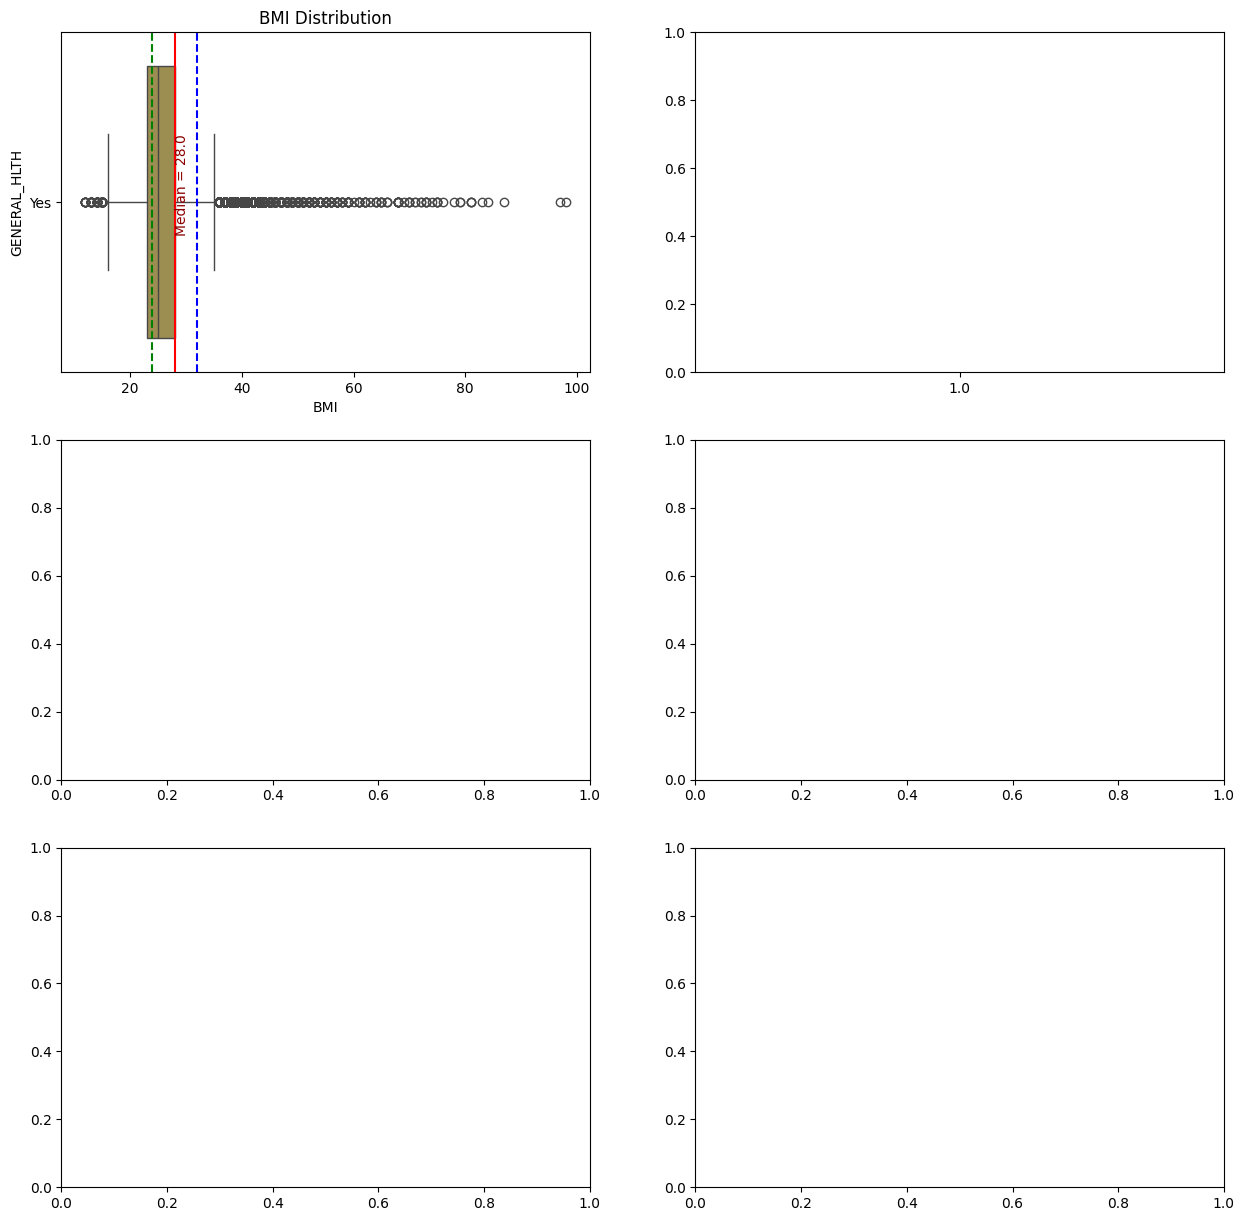

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(3, 2, figsize=(15, 15))  # Adjust the layout to match your grid

# Boxplot for BMI
sns.boxplot(ax=axes[0, 0], x=df['BMI'], y=df['GENERAL_HLTH'].map({1: 'Yes', 0: 'No'}), color='#a89444')
axes[0, 0].set_title('BMI Distribution')
plotaxis('BMI', axes[0, 0])

# Boxplot for General Health
sns.boxplot(ax=axes[0, 1], x=df['GENERAL_HLTH'], y=df['BMI'].map({1: 'Yes', 0: 'No'}), color='#72b6a1')
axes[0, 1].set_title('General Health Distribution')
plotaxis('GENERAL_HLTH', axes[0, 1])

# Boxplot for Mental Health
sns.boxplot(ax=axes[1, 0], x=df['MENTHLTH_BAD'], y=df['BMI'].map({1: 'Yes', 0: 'No'}), color='#62a0de')
axes[1, 0].set_title('Mental Health Distribution')
plotaxis('MENTHLTH_BAD', axes[1, 0])

# Boxplot for Physical Health
sns.boxplot(ax=axes[1, 1], x=df['PHYSHLTH_BAD'], y=df['BMI'].map({1: 'Yes', 0: 'No'}), color='#8e91ce')
axes[1, 1].set_title('Physical Health Distribution')
plotaxis('PHYSHLTH_BAD', axes[1, 1])

# Boxplot for Number of Children
sns.boxplot(ax=axes[2, 0], x=df['NUM_CHILDERN'], y=df['BMI'].map({1: 'Yes', 0: 'No'}), color='#8e91ce')
axes[2, 0].set_title('Number of Children Distribution')
plotaxis('NUM_CHILDERN', axes[2, 0])

plt.tight_layout()
plt.show()


ValueError: List of boxplot statistics and `positions` values must have same the length

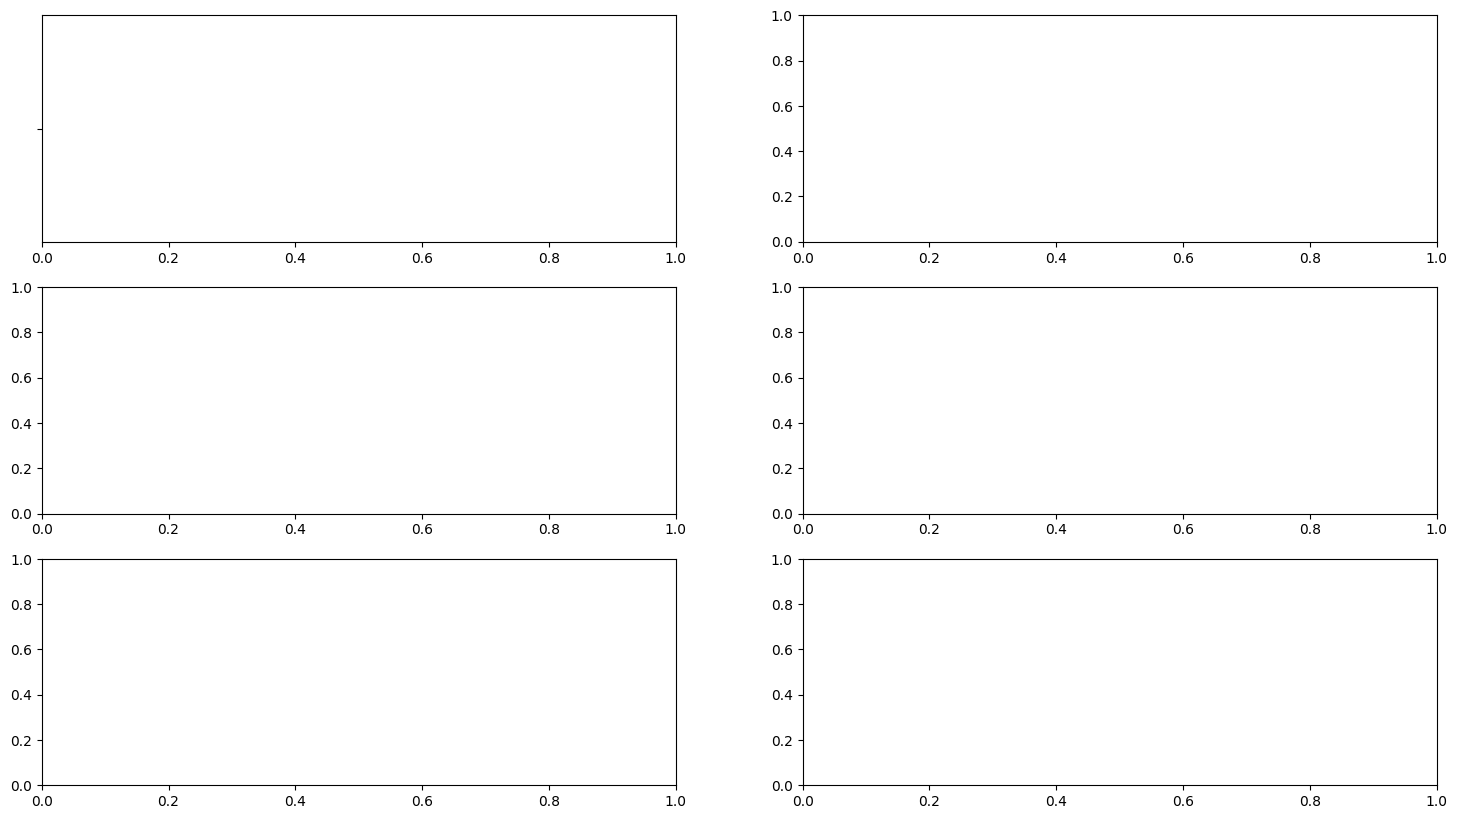

In [ ]:
def plotaxis(pval,paxis):
  q1 = np.percentile(df[pval], 25)
  q2 = np.percentile(df[pval], 50)
  q3 = np.percentile(df[pval], 75)

  paxis.text(q2, 0.1, f'Median = {q2:.1f}', color='darkred', verticalalignment='bottom', rotation=90)

  paxis.axvline(q1, color='green', linestyle='--')
  paxis.axvline(q2, color='red', linestyle='-', label='Q2')
  paxis.axvline(q3, color='blue', linestyle='--')

fig, axes = plt.subplots(3, 2, figsize=(18, 10))

sns.boxplot(ax=axes[0, 0], x=df['BMI'].map({1: 'Yes', 0: 'No'}), color='#a89444')
# axes[0, 0].set_title('BMI Distribution')
plotaxis('BMI',axes[0, 0])

sns.boxplot(ax=axes[0, 1], x=df['GENERAL_HLTH'].map({1: 'Yes', 0: 'No'}), color='#72b6a1')
# axes[0, 1].set_title('General Health Distribution')
plotaxis('GENERAL_HLTH',axes[0, 1])

sns.boxplot(ax=axes[1, 0], x=df['MENTHLTH_BAD'].map({1: 'Yes', 0: 'No'}), color='#62a0de')
# axes[1, 0].set_title('Mental Health Distribution')
plotaxis('MENTHLTH_BAD',axes[1, 0])

sns.boxplot(ax=axes[1, 1], x=df['PHYSHLTH_BAD'].map({1: 'Yes', 0: 'No'}), color='#8e91ce')
# axes[1, 1].set_title('Physical Health Distribution')
plotaxis('PHYSHLTH_BAD',axes[1, 1])

sns.boxplot(ax=axes[2, 0], x=df['NUM_CHILDERN'].map({1: 'Yes', 0: 'No'}), color='#8e91ce')
# axes[2, 0].set_title('NUM_CHILDERN Distribution')
plotaxis('NUM_CHILDERN',axes[2, 0])


for ax in axes.flat:
    ax.tick_params(axis='x', labelrotation=90)

plt.tight_layout
plt.show()

# **5. Data Analysis**

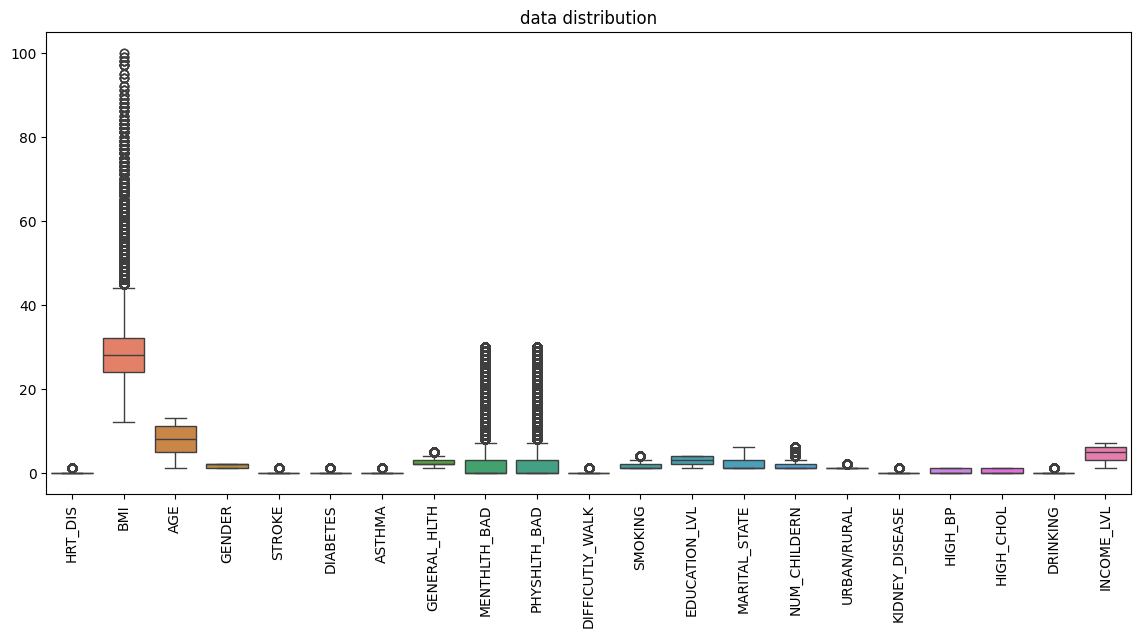

In [ ]:

plt.figure(figsize=(14,6))
sns.boxplot(df)
l=list(np.arange(21))
plt.title("data distribution")
plt.xticks(l, list(df.columns), rotation=90)
plt.show()

In [ ]:
df['MENTHLTH_BAD'].value_counts().sort_values()

,count
MENTAL_HLTH,
19.0,62
23.0,184
11.0,188
26.0,189
24.0,198
13.0,245
22.0,261
27.0,310
17.0,342


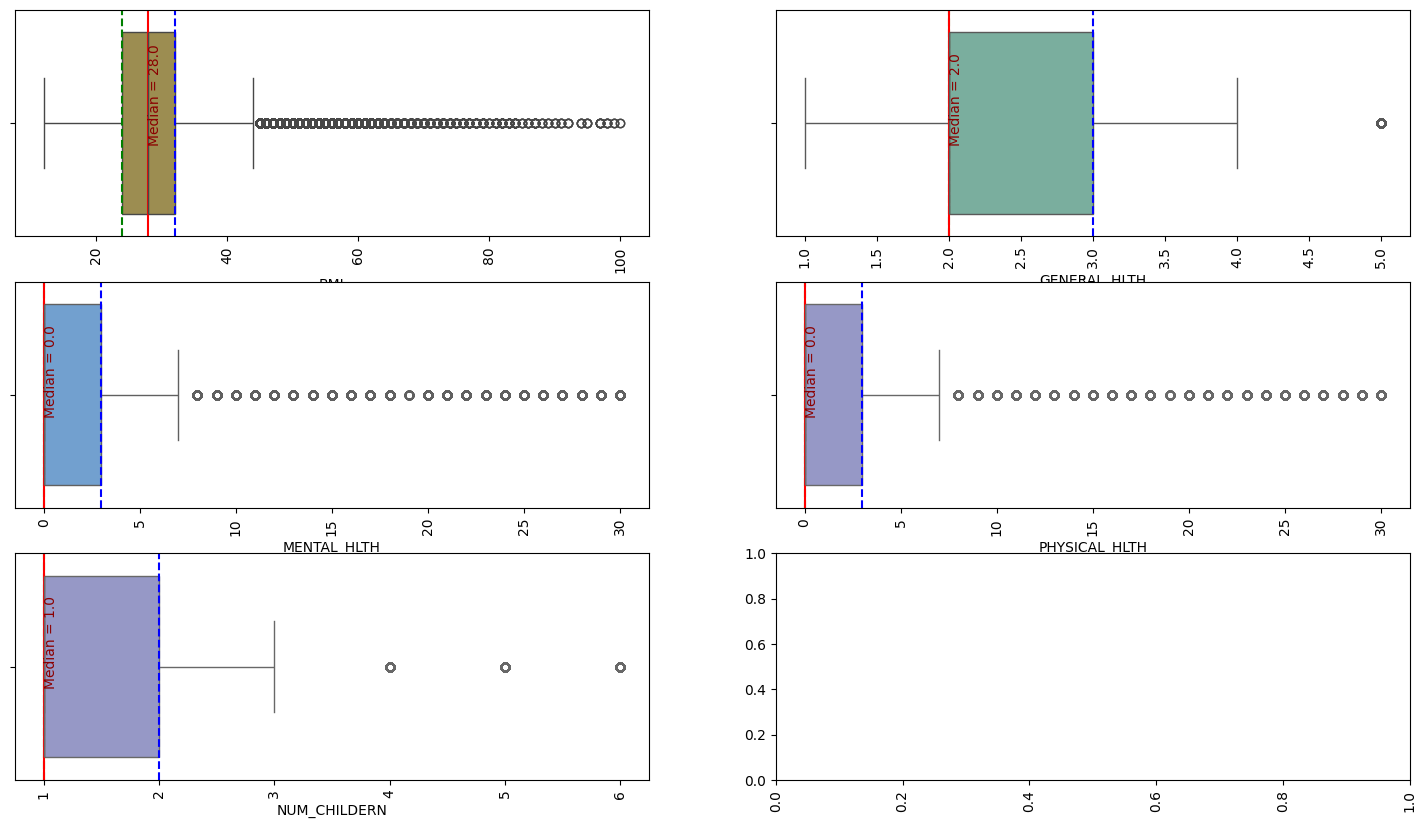

In [ ]:
def plotaxis(pval,paxis):
  q1 = np.percentile(df[pval], 25)
  q2 = np.percentile(df[pval], 50)
  q3 = np.percentile(df[pval], 75)

  paxis.text(q2, 0.1, f'Median = {q2:.1f}', color='darkred', verticalalignment='bottom', rotation=90)

  paxis.axvline(q1, color='green', linestyle='--')
  paxis.axvline(q2, color='red', linestyle='-', label='Q2')
  paxis.axvline(q3, color='blue', linestyle='--')

fig, axes = plt.subplots(3, 2, figsize=(18, 10))

sns.boxplot(ax=axes[0, 0], x=df['BMI'], color='#a89444')
# axes[0, 0].set_title('BMI Distribution')
plotaxis('BMI',axes[0, 0])

sns.boxplot(ax=axes[0, 1], x=df['GENERAL_HLTH'], color='#72b6a1')
# axes[0, 1].set_title('General Health Distribution')
plotaxis('GENERAL_HLTH',axes[0, 1])

sns.boxplot(ax=axes[1, 0], x=df['MENTHLTH_BAD'], color='#62a0de')
# axes[1, 0].set_title('Mental Health Distribution')
plotaxis('MENTHLTH_BAD',axes[1, 0])

sns.boxplot(ax=axes[1, 1], x=df['PHYSHLTH_BAD'], color='#8e91ce')
# axes[1, 1].set_title('Physical Health Distribution')
plotaxis('PHYSHLTH_BAD',axes[1, 1])

sns.boxplot(ax=axes[2, 0], x=df['NUM_CHILDERN'], color='#8e91ce')
# axes[2, 0].set_title('NUM_CHILDERN Distribution')
plotaxis('NUM_CHILDERN',axes[2, 0])


for ax in axes.flat:
    ax.tick_params(axis='x', labelrotation=90)

plt.tight_layout
plt.show()

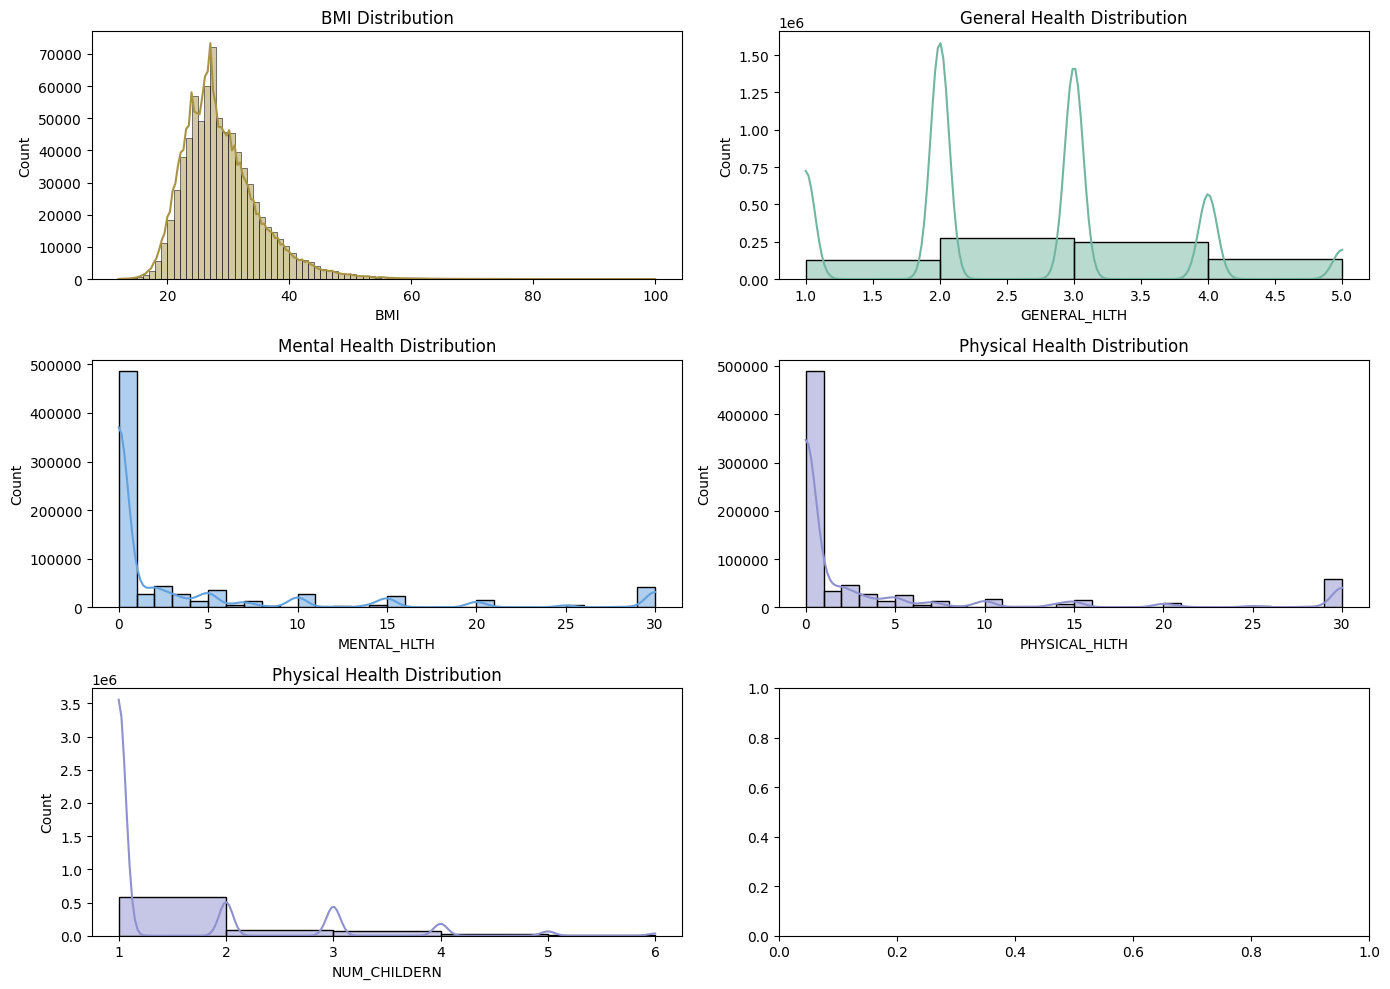

In [ ]:
fig, axes = plt.subplots(3, 2, figsize=(14, 10))

sns.histplot(df['BMI'], ax=axes[0, 0], kde=True, binwidth=1, color='#a89444')
axes[0, 0].set_title('BMI Distribution')

sns.histplot(df['GENERAL_HLTH'], ax=axes[0, 1], kde=True, binwidth=1, color='#72b6a1')
axes[0, 1].set_title('General Health Distribution')

sns.histplot(df['MENTHLTH_BAD'], ax=axes[1, 0], kde=True, binwidth=1, color='#62a0de')
axes[1, 0].set_title('Mental Health Distribution')

sns.histplot(df['PHYSHLTH_BAD'], ax=axes[1, 1], kde=True, binwidth=1, color='#8e91ce')
axes[1, 1].set_title('Physical Health Distribution')

sns.histplot(df['NUM_CHILDERN'], ax=axes[2, 0], kde=True, binwidth=1, color='#8e91ce')
axes[2, 0].set_title('Physical Health Distribution')

plt.tight_layout()
plt.show()

## 1. Outlier Flagging

In [ ]:
# BMI _ FLAG
Q1 = df['BMI'].quantile(0.25)
Q3 = df['BMI'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Creating the flag
df['OUTLIER_BMI'] = ((df['BMI'] < lower_bound) | (df['BMI'] > upper_bound)).astype(int)


In [ ]:
# MENTHLTH_BAD _ FLAG
Q1 = df['MENTHLTH_BAD'].quantile(0.25)
Q3 = df['MENTHLTH_BAD'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Creating the flag
df['OUTLIER_MENTHLTH_BAD'] = ((df['MENTHLTH_BAD'] < lower_bound) | (df['MENTHLTH_BAD'] > upper_bound)).astype(int)


In [ ]:
# PHYSHLTH_BAD _ FLAG
Q1 = df['PHYSHLTH_BAD'].quantile(0.25)
Q3 = df['PHYSHLTH_BAD'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Creating the flag
df['OUTLIER_PHYSHLTH_BAD'] = ((df['PHYSHLTH_BAD'] < lower_bound) | (df['PHYSHLTH_BAD'] > upper_bound)).astype(int)


In [ ]:
# NUM_CHILDERN _ FLAG
Q1 = df['NUM_CHILDERN'].quantile(0.25)
Q3 = df['NUM_CHILDERN'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Creating the flag
df['OUTLIER_NUM_CHILDERN'] = ((df['NUM_CHILDERN'] < lower_bound) | (df['NUM_CHILDERN'] > upper_bound)).astype(int)


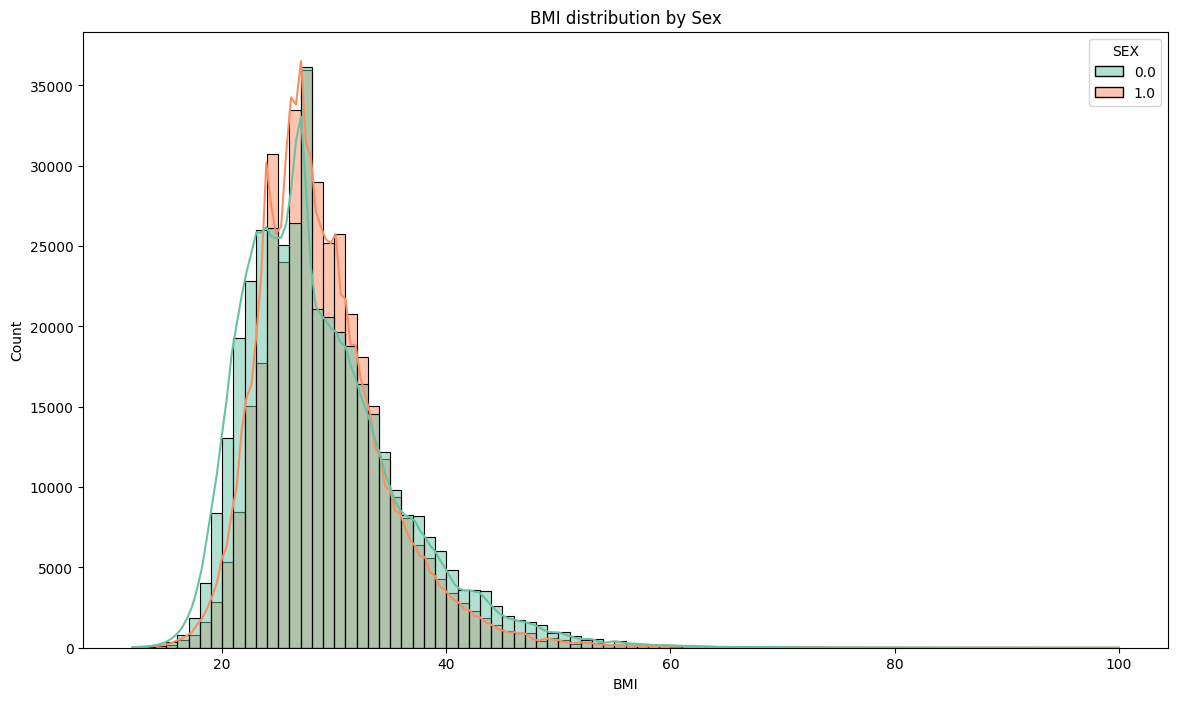

In [ ]:
plt.figure(figsize=(14,8))  # Adjust the figure size as needed
sns.histplot(df, x='BMI', kde=True, binwidth=1 , palette="Set2", hue='SEX')
plt.title('BMI distribution by Sex')
plt.xlabel('BMI')
plt.ylabel('Count')
plt.show()

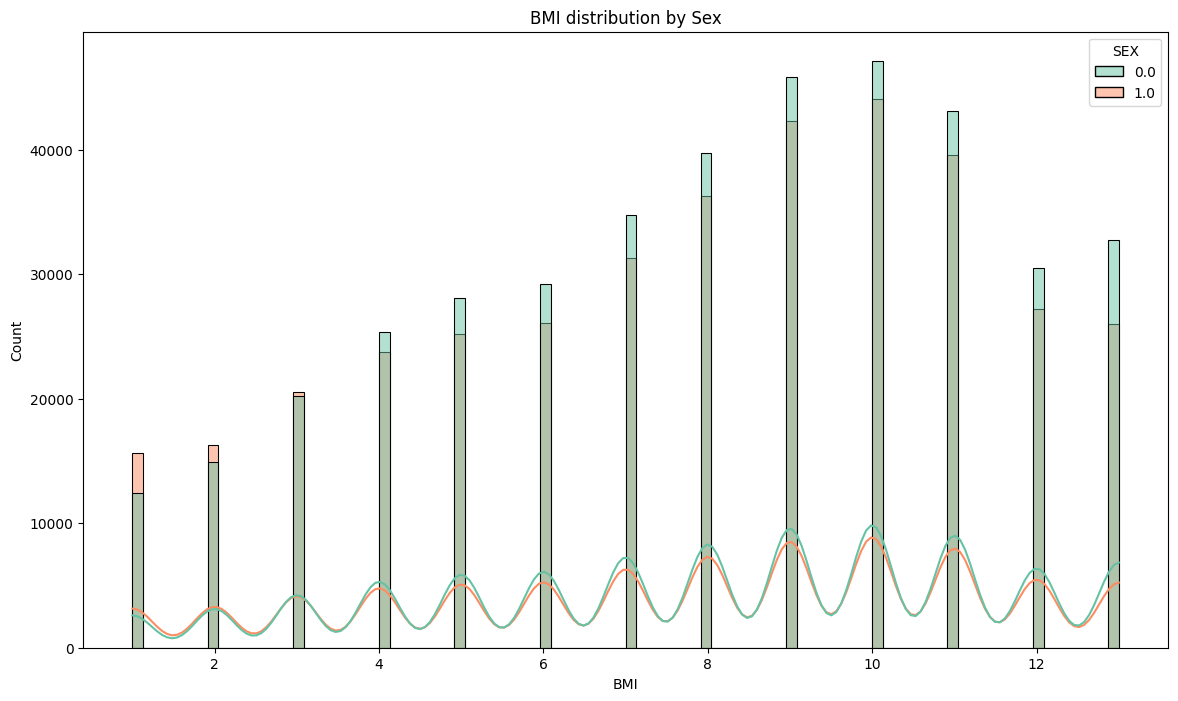

In [ ]:
plt.figure(figsize=(14,8))  # Adjust the figure size as needed
sns.histplot(df, x='AGE', palette="Set2", hue='SEX', kde =True)
plt.title('BMI distribution by Sex')
plt.xlabel('BMI')
plt.ylabel('Count')
plt.show()

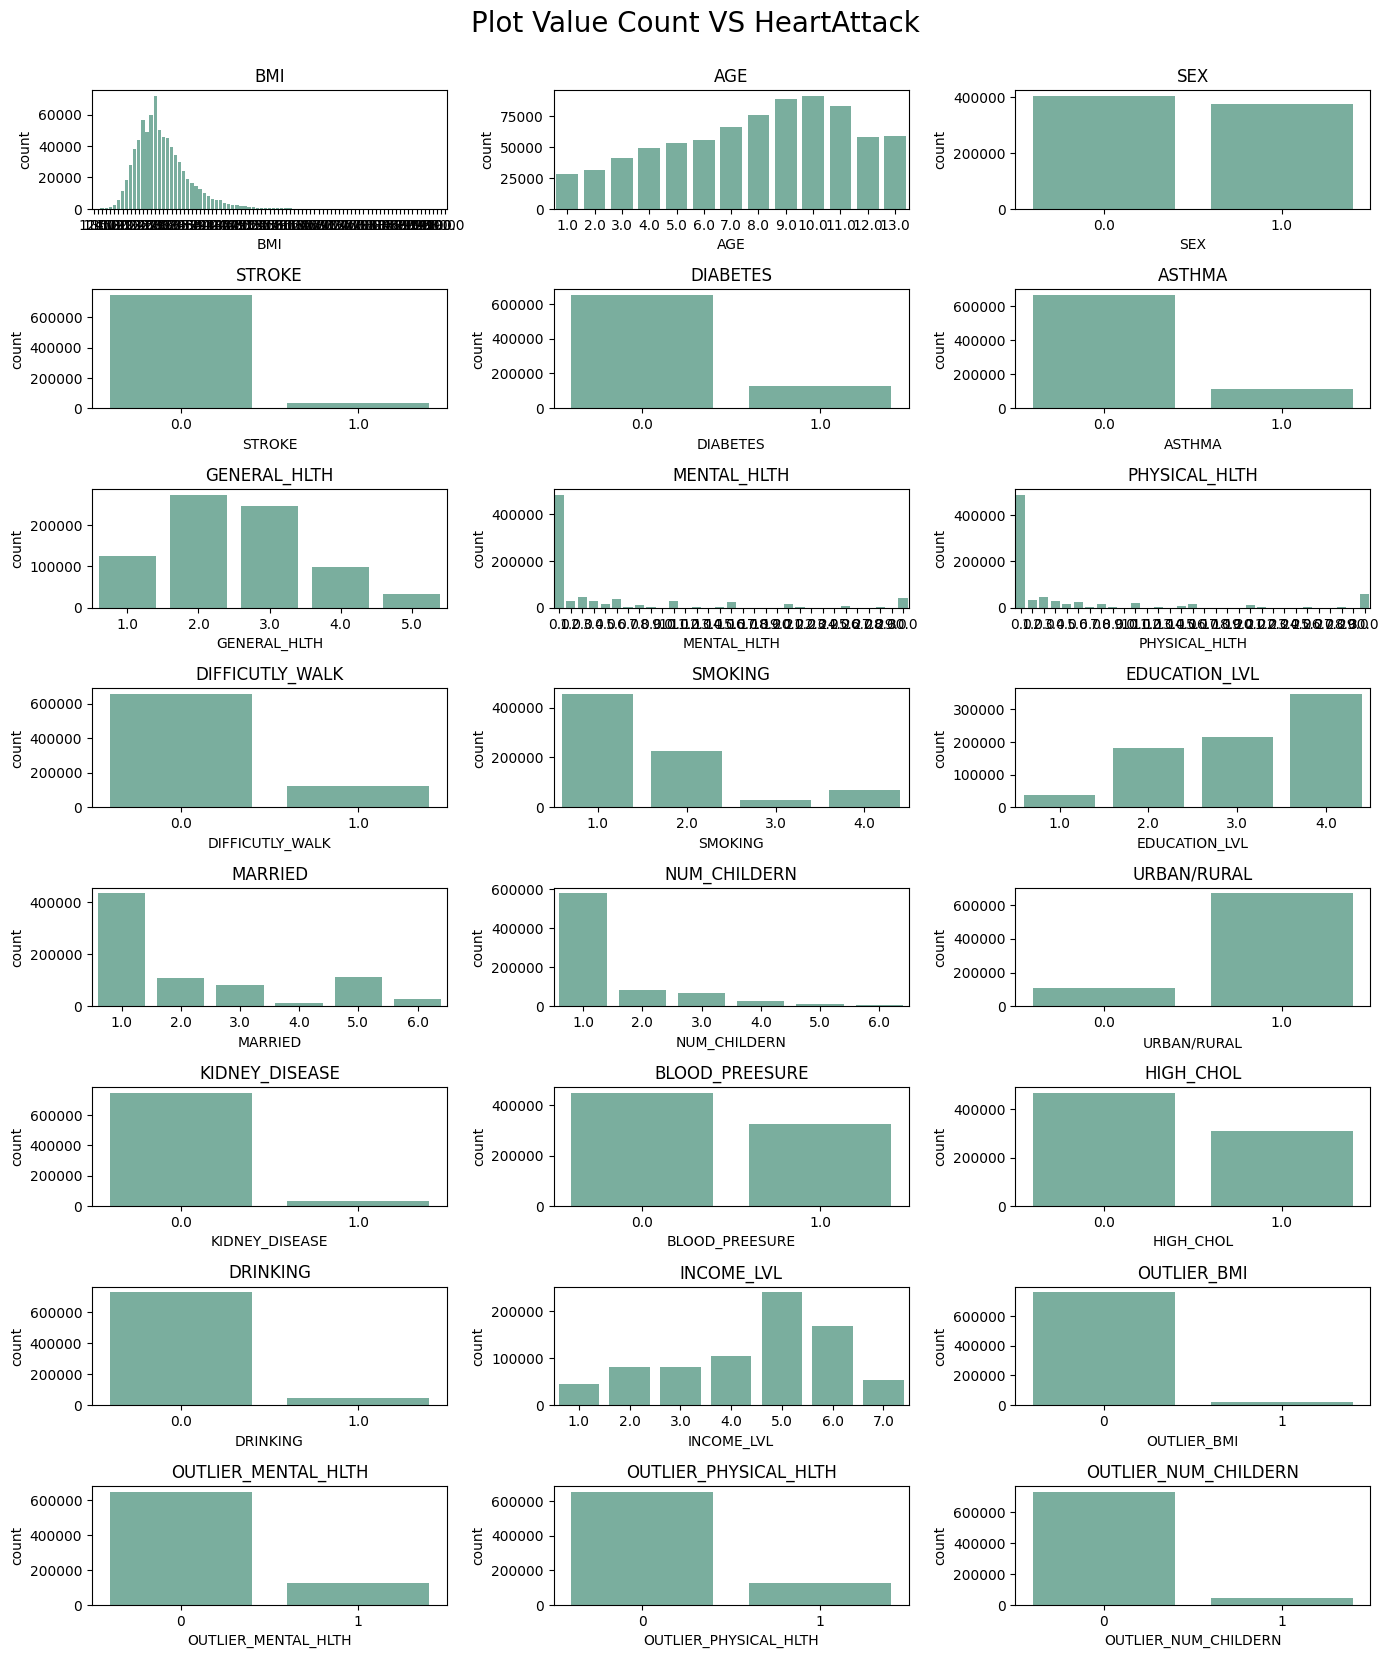

In [ ]:
plt.figure(figsize=(14,50))
for i,column in enumerate(df.columns[1:]):
    plt.subplot(len(df.columns), 3, i+1)
    plt.suptitle("Plot Value Count VS HeartAttack", fontsize=20, x=0.5, y=1)
    sns.countplot(data=df, x=column, color='#72b6a1')
    plt.title(f"{column}")
    plt.tight_layout()

In [ ]:
df.to_csv('output.csv', index=False, header=True)

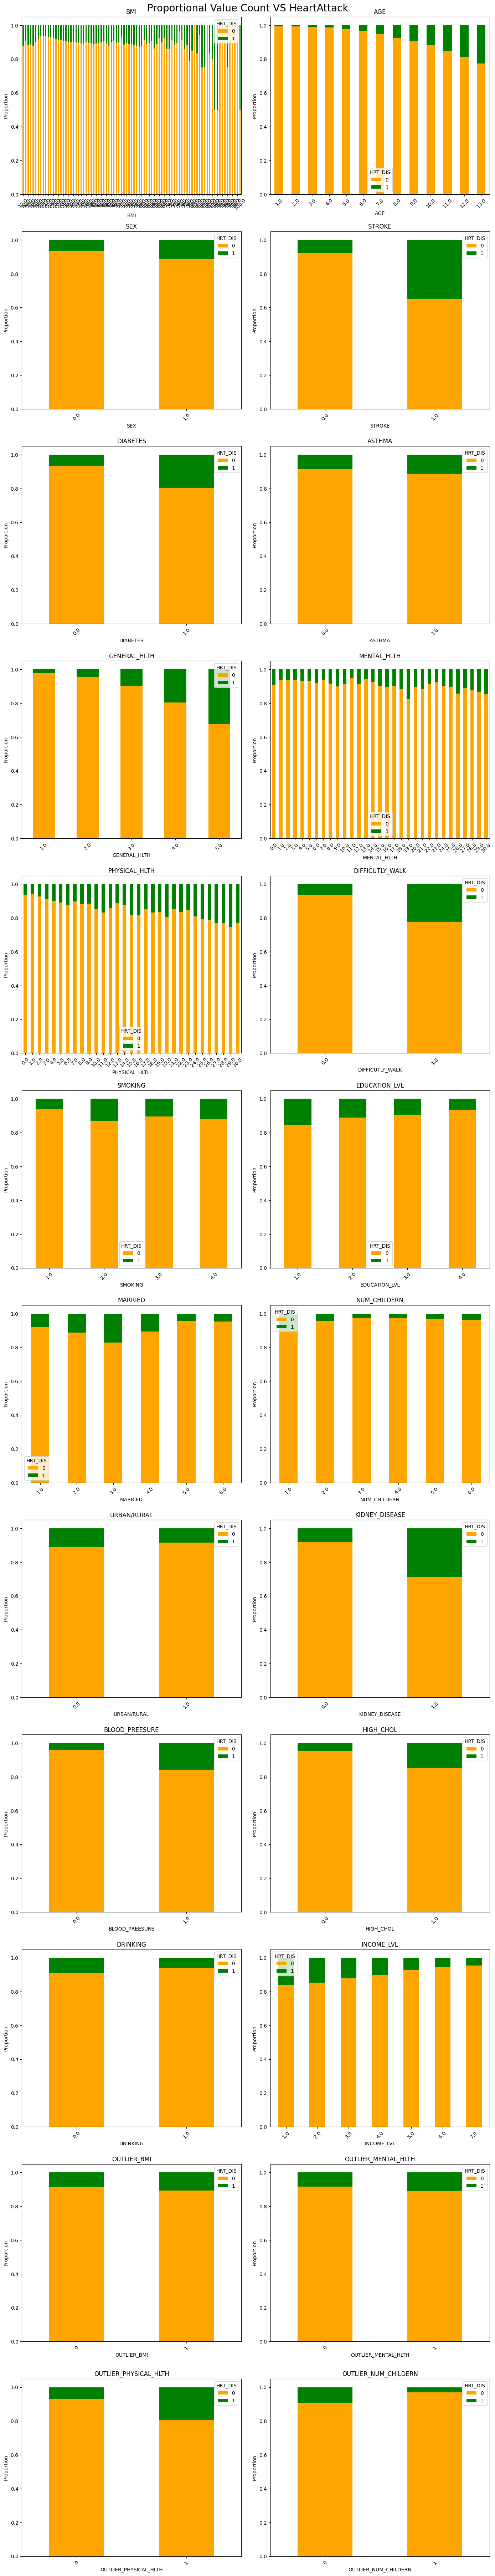

In [ ]:
plt.figure(figsize=(14, 6 * (df.shape[1] - 1)))  # Adjusting height based on the number of columns
for i, column in enumerate(df.columns[1:]):
    plt.subplot(len(df.columns) - 1, 2, i + 1)

    # Calculate the normalized count
    count_data = df.groupby(column, observed=False)['HRT_DIS'].value_counts(normalize=True).unstack().fillna(0)

    # Create a bar plot
    count_data.plot(kind='bar', stacked=True, color=['orange', 'green'], ax=plt.gca())

    plt.title(f"{column}")
    plt.xlabel(column)
    plt.ylabel("Proportion")
    plt.xticks(rotation=45)
    plt.legend(title='HRT_DIS', labels=['0', '1'])
    plt.tight_layout()

plt.suptitle("Proportional Value Count VS HeartAttack", fontsize=20, x=0.5, y=1)
plt.show()

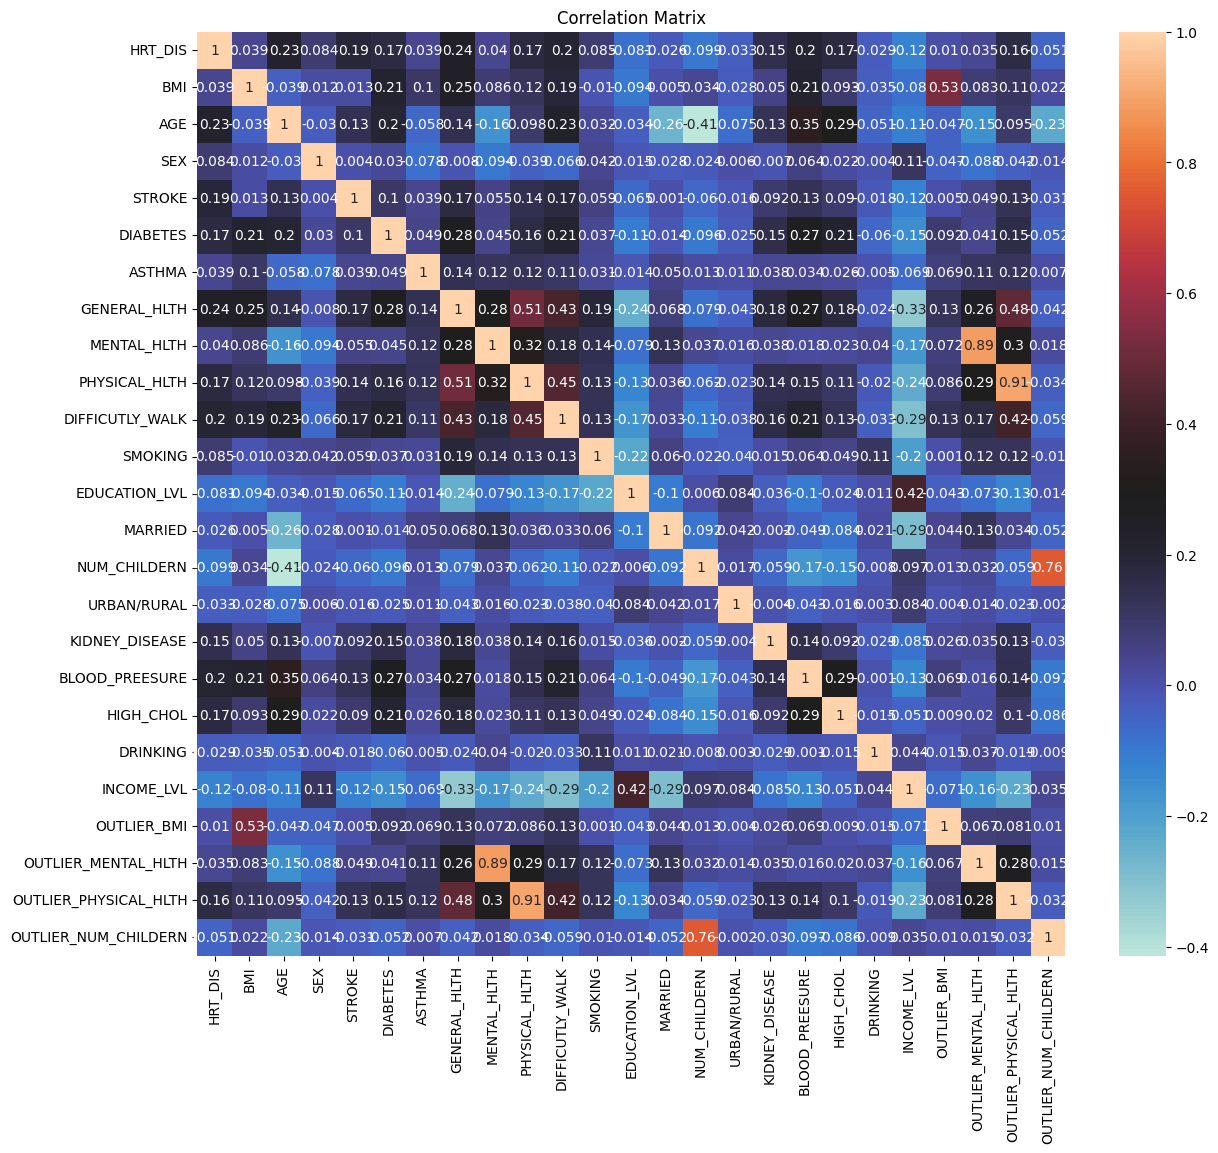

In [ ]:
# Correlation Matrix

plt.figure(figsize=(14,12))
corr_matrix = df.corr().round(3)
sns.heatmap(corr_matrix, annot=True, cmap='icefire')
plt.title('Correlation Matrix')
plt.show()

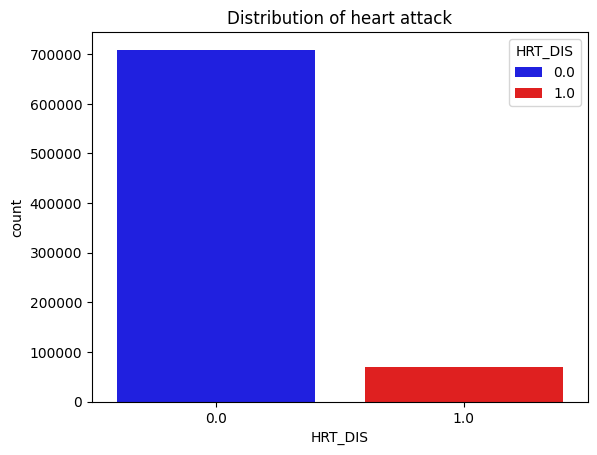

In [ ]:
# Data Proportion Heart Disease Distribution in Data

sns.countplot(data=df, x="HRT_DIS", hue='HRT_DIS', palette=['blue', 'red'])
plt.title("Distribution of heart attack")
plt.show()

In [ ]:
 df.corr()['HRT_DIS'].sort_values(ascending=False)

,HRT_DIS
HRT_DIS,1.000000
GENERAL_HLTH,0.238777
AGE,0.224880
BLOOD_PREESURE,0.204438
DIFFICUTLY_WALK,0.201972
STROKE,0.190637
HIGH_CHOL,0.174568
PHYSICAL_HLTH,0.174069
DIABETES,0.171184
OUTLIER_PHYSICAL_HLTH,0.162456


In [ ]:
# Separate features (X) and target variable (y)
X = df.drop(columns=['HRT_DIS'])
y = df['HRT_DIS']

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=17)

X_resampled, y_resampled = smote.fit_resample(X, y)

# Convert resampled data back to pandas DataFrame
X_newdf = pd.DataFrame(X_resampled, columns=X.columns)
y_newseries = pd.Series(y_resampled, name=y.name)
newdf = pd.concat([X_newdf, y_newseries], axis=1)

In [ ]:
df.shape

(778235, 25)

In [ ]:
newdf.shape

(1417822, 25)

In [ ]:
X=newdf.drop(columns=['HRT_DIS','DRINKING','MARITAL_STATE','MENTHLTH_BAD'])
y=newdf['HRT_DIS']

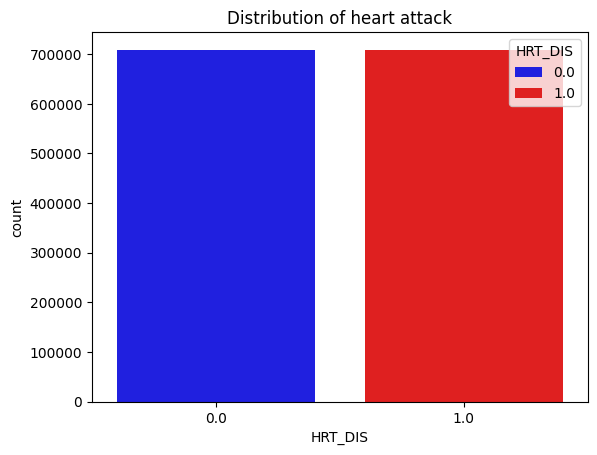

In [ ]:
# Data Proportion Heart Disease Distribution in Data

sns.countplot(data=newdf, x="HRT_DIS", hue='HRT_DIS', palette=['blue', 'red'])
plt.title("Distribution of heart attack")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=17)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.metrics import accuracy_score,classification_report ,confusion_matrix,ConfusionMatrixDisplay

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import  GradientBoostingClassifier
from xgboost import XGBClassifier


In [ ]:
models = {
    'Logistic Regression': LogisticRegression(),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Bagging': BaggingClassifier(),
    'Ada Boosting':AdaBoostClassifier(),
    "XGBClassifier":XGBClassifier()
}

Training Logistic Regression...
              precision    recall  f1-score   support

         0.0       0.79      0.75      0.77    176716
         1.0       0.76      0.81      0.78    177740

    accuracy                           0.78    354456
   macro avg       0.78      0.78      0.78    354456
weighted avg       0.78      0.78      0.78    354456

Logistic Regression Accuracy: 77.79%



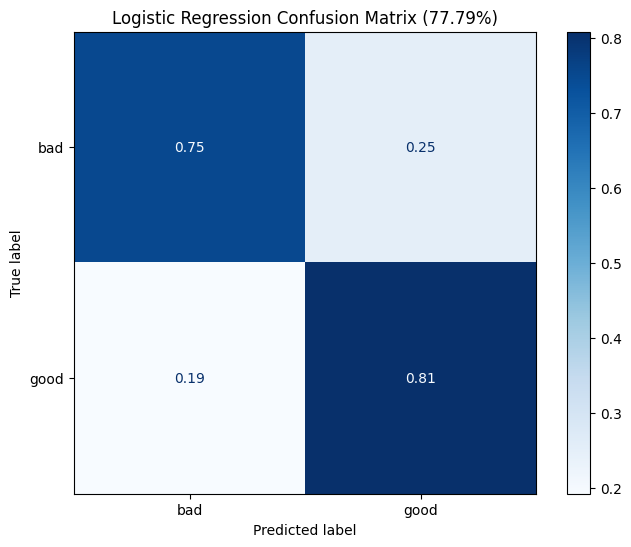

Training KNN...
              precision    recall  f1-score   support

         0.0       0.92      0.85      0.89    176716
         1.0       0.87      0.93      0.90    177740

    accuracy                           0.89    354456
   macro avg       0.90      0.89      0.89    354456
weighted avg       0.90      0.89      0.89    354456

KNN Accuracy: 89.30%



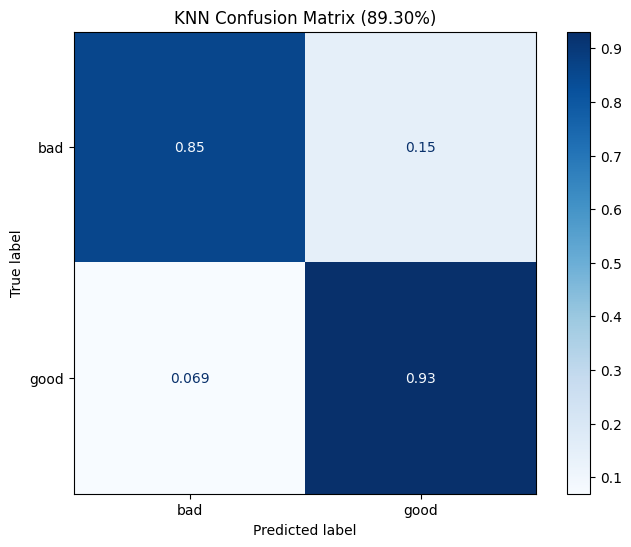

Training Decision Tree...
              precision    recall  f1-score   support

         0.0       0.92      0.92      0.92    176716
         1.0       0.92      0.92      0.92    177740

    accuracy                           0.92    354456
   macro avg       0.92      0.92      0.92    354456
weighted avg       0.92      0.92      0.92    354456

Decision Tree Accuracy: 91.97%



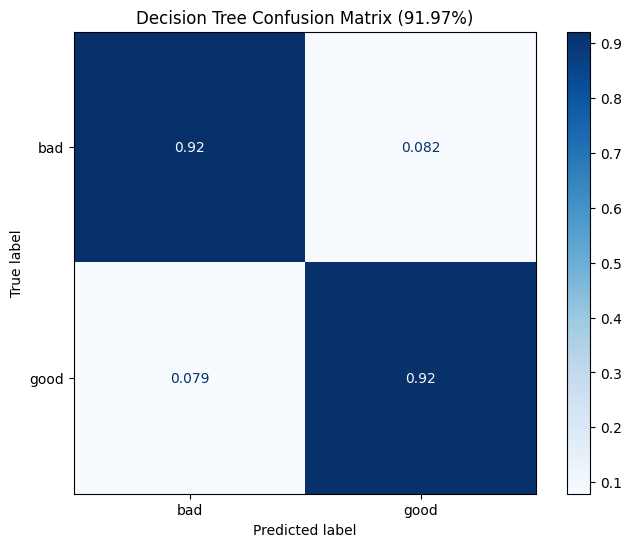

Training Random Forest...
              precision    recall  f1-score   support

         0.0       0.92      0.97      0.95    176716
         1.0       0.97      0.92      0.94    177740

    accuracy                           0.95    354456
   macro avg       0.95      0.95      0.95    354456
weighted avg       0.95      0.95      0.95    354456

Random Forest Accuracy: 94.58%



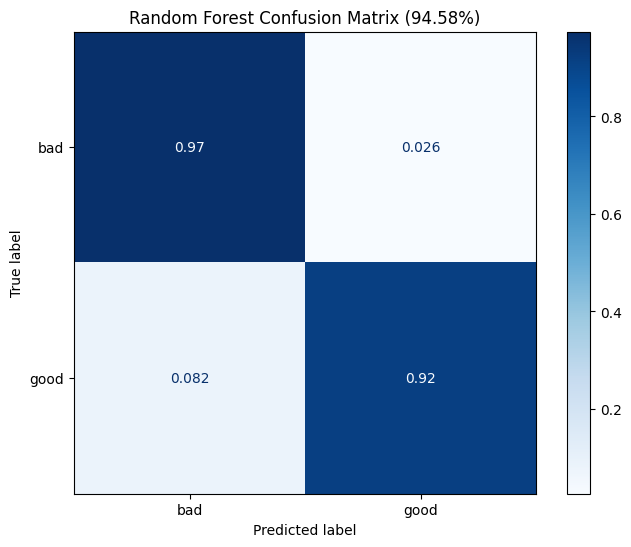

Training Bagging...
              precision    recall  f1-score   support

         0.0       0.92      0.96      0.94    176716
         1.0       0.96      0.92      0.94    177740

    accuracy                           0.94    354456
   macro avg       0.94      0.94      0.94    354456
weighted avg       0.94      0.94      0.94    354456

Bagging Accuracy: 93.86%



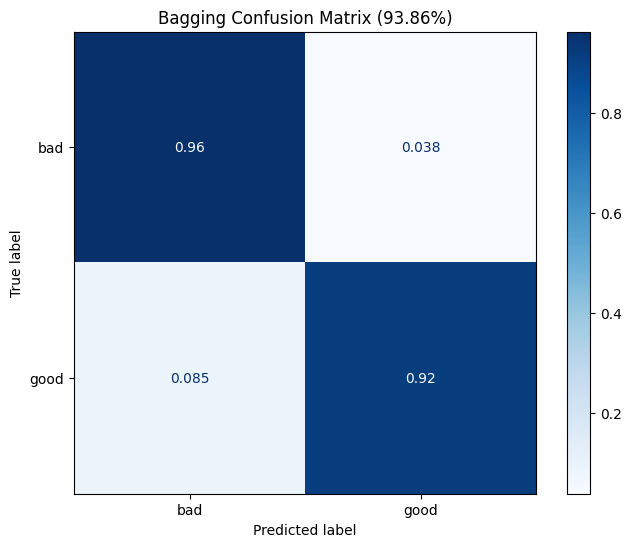

Training Ada Boosting...


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


              precision    recall  f1-score   support

         0.0       0.88      0.90      0.89    176716
         1.0       0.90      0.88      0.89    177740

    accuracy                           0.89    354456
   macro avg       0.89      0.89      0.89    354456
weighted avg       0.89      0.89      0.89    354456

Ada Boosting Accuracy: 89.13%



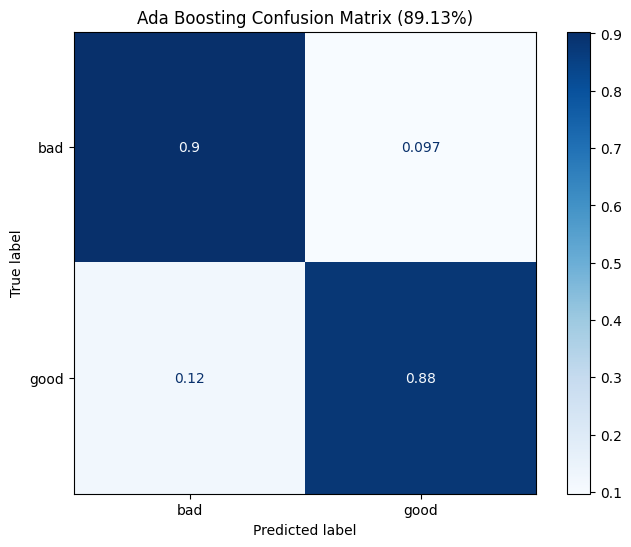

Training XGBClassifier...
              precision    recall  f1-score   support

         0.0       0.91      0.99      0.95    176716
         1.0       0.99      0.90      0.94    177740

    accuracy                           0.94    354456
   macro avg       0.95      0.94      0.94    354456
weighted avg       0.95      0.94      0.94    354456

XGBClassifier Accuracy: 94.40%



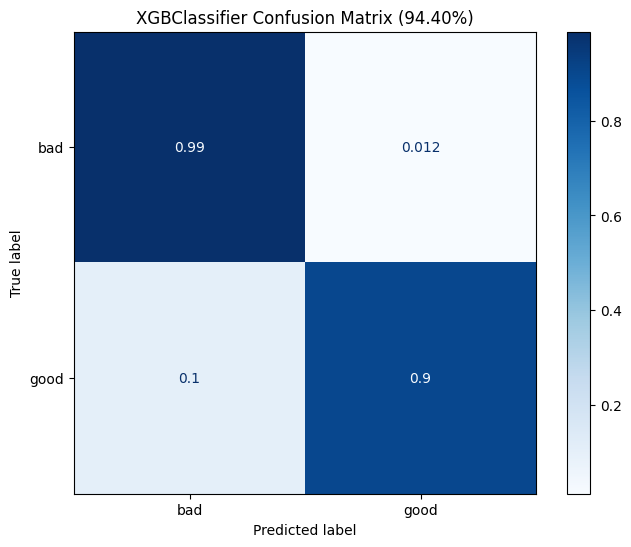

In [ ]:
accuracies = {}

for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    accuracies[name] = accuracy

    print(classification_report(y_test, y_pred))
    print(f"{name} Accuracy: {accuracy * 100:.2f}%\n")

    cm = confusion_matrix(y_test, y_pred.reshape(-1,1), normalize='true')
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['bad','good'], )
    fig, ax = plt.subplots(figsize=(8,6))
    ax.set_title(f"{name} Confusion Matrix ({accuracy * 100:.2f}%)")
    disp.plot(ax=ax,cmap='Blues')
    plt.show()

              precision    recall  f1-score   support

         0.0       0.93      0.96      0.94    176716
         1.0       0.96      0.92      0.94    177740

    accuracy                           0.94    354456
   macro avg       0.94      0.94      0.94    354456
weighted avg       0.94      0.94      0.94    354456

StackingClassifier Accuracy: 94.15%



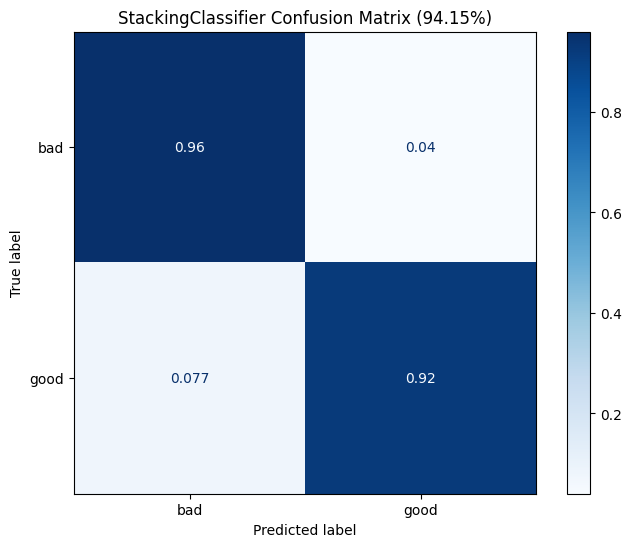

In [ ]:
from sklearn.ensemble import  GradientBoostingClassifier,StackingClassifier

# Define base models
base_models = [
    ('rf', RandomForestClassifier(n_estimators=10, random_state=17)),
    ('bc', BaggingClassifier(n_estimators=10, random_state=17))
]

meta_model = LogisticRegression()

stacking_clf = StackingClassifier(estimators=base_models, final_estimator=meta_model)
stacking_clf.fit(X_train, y_train)

y_pred = stacking_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracies['StackingClassifier'] = accuracy

models.update({'StackingClassifier':stacking_clf})

print(classification_report(y_test, y_pred))
print(f"StackingClassifier Accuracy: {accuracy * 100:.2f}%\n")

cm = confusion_matrix(y_test, y_pred.reshape(-1,1), normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['bad','good'], )
fig, ax = plt.subplots(figsize=(8,6))
ax.set_title(f"StackingClassifier Confusion Matrix ({accuracy * 100:.2f}%)")
disp.plot(ax=ax,cmap='Blues')
plt.show()

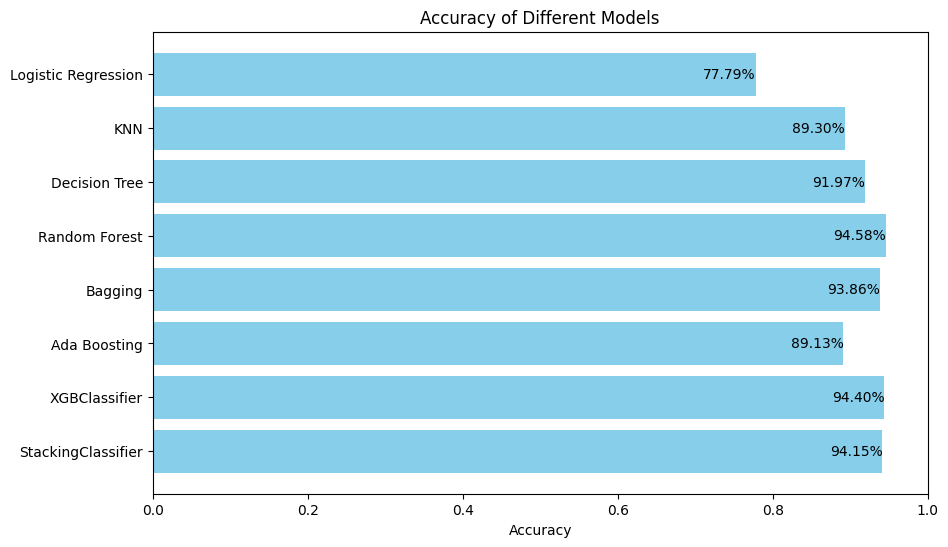

In [ ]:
plt.figure(figsize=(10, 6))
bars = plt.barh(list(accuracies.keys()), list(accuracies.values()), color='skyblue')
plt.xlabel('Accuracy')
plt.title('Accuracy of Different Models')
plt.xlim(0, 1)
plt.gca().invert_yaxis()

for bar in bars:
  width = bar.get_width()
  plt.text(width, bar.get_y() + bar.get_height()/2, f'{width* 100:.2f}%', ha='right', va='center')

plt.show()
